---
# KMeans Clustering
---


**Results**

| Cluster | Interpretation for Games|
| :---------: |----------------|
| 0       | - Pre-teens</br>- Short play time</br>- Low to high ratings</br>- Average popularity               |
| 1       | - Teens & Adults </br>- Moderate play time</br>- Moderate ratings</br>- Low popularity                |
| 2       | - Pre-teens</br>- Moderate play time</br>- Moderate ratings</br>- High popularity                |
| 3       | - Kids</br>- Very short play time</br>- Low ratings</br>- Unpopular                |
| 4       | - Teens & Adults</br>- Short to long play time</br>- High ratings</br>- Average popularity                |
| 5       | - Teens & Adults</br>- Long play time</br>- High ratings</br>- Highest popularity                 |
| 6       | - Mid-Teens & Adults</br>- Longest play time</br>- Highest ratings</br>- Low popularity                |
| 7       | - Teens & Adults</br>- Moderate play time</br>- Low to high ratings</br>- Lowest popularity                |

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

---

<center>
    
## Preparing data

</center>

---

### Read data file

In [2]:
df = pd.read_csv('../data/games_comments_sentiment_summarized.csv')
df

,username,rating,comment,gamename,mechanics,min_players,max_players,minplaytime,maxplaytime,age,ratings_avg,count_wanting,count_wishing,description,categories,lang,Sentiment
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8
1,Corwin007,NaN,UPCOMING\n\nArk Nova lite?,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6
2,IronTarkles,NaN,New game from ark nova designer,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,10
3,MarkyX,NaN,I'm very interested in this one. I like the co...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8
4,mikamikomi,1.0,3 artist yet still use stock photos? oh yeah,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,chicagometh,4.8,"4...'Not so good, but could play again' by BGG...",Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8
4194,Chris Coyote,NaN,Birthday 2025,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,10
4195,Chris_P85,9.0,Played a half Game at Spiel 24,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,2
4196,Chutch1035,5.0,I love Feld games and I love Civ games. When I...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8


In [3]:
df.columns

Index(['username', 'rating', 'comment', 'gamename', 'mechanics', 'min_players',
       'max_players', 'minplaytime', 'maxplaytime', 'age', 'ratings_avg',
       'count_wanting', 'count_wishing', 'description', 'categories', 'lang',
       'Sentiment'],
      dtype='object')

### List of columns to work with

In [4]:
col2discard = []

col2keep = ['max_players',
            'minplaytime',
            'maxplaytime', 
            'age', 
            'ratings_avg', 
            'count_wanting',
            'count_wishing',
            'Sentiment'
           ]

col2encode = ['gamename', 
              'mechanics',
              'categories', 
              'lang'
             ]

### Define X features

In [5]:
X = df[col2keep]

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Scale X subset
#X_sub_scaled = scaler.fit_transform(X_sub)

---

<center>
    
## Find best optimal K value

</center>

---

**Elbow plot**

In [7]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 20
for k in range(2, 20):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

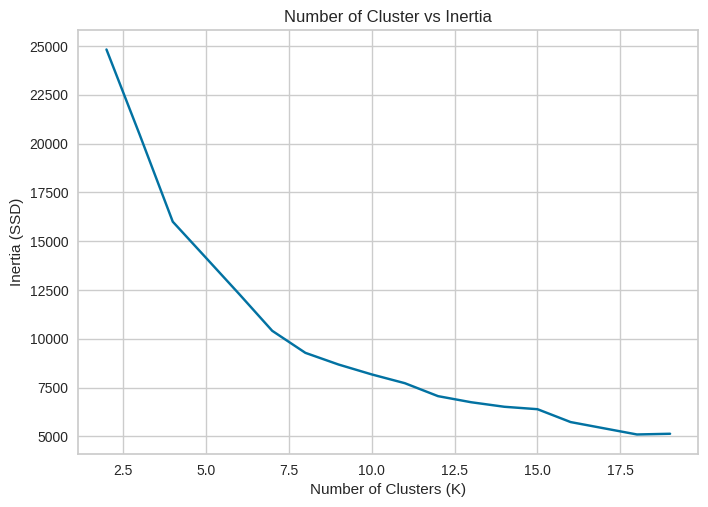

In [8]:
# Plot the elbow graph
plt.plot(range(2, 20), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

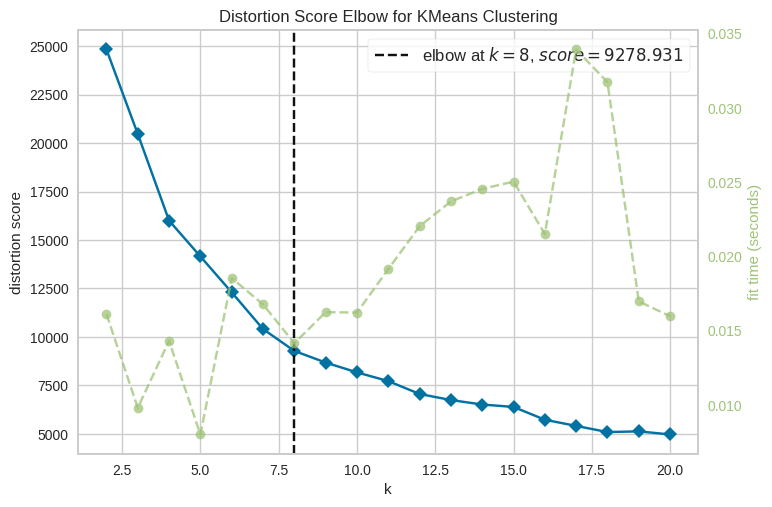

In [9]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=20)
Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

---

<center>
    
## KMeans Model

</center>

---

---
### Creating a KMeans model with X clusters

---

**Create intance of model**

In [10]:
kmeans = KMeans(n_clusters=8, random_state=5)

**Fit the model on the dataset**

In [11]:
kmeans.fit(X_scaled)

KMeans(random_state=5)

---
### Evaluate the value K=8 for number of cluster

---

**Add Cluster labels to the dataframe**

In [12]:
df['label'] = kmeans.labels_

df['label_str'] = kmeans.labels_.astype(str)

In [13]:
palette = [
    "green",
    "magenta",
    "deepskyblue",
    "darkorchid",
    "lightpink",
    "darkorange",
    "red",
    "navy",
    "chartreuse",
    "tomato",
    "turquoise",
    "dodgerblue",
    "yellowgreen",
    "deeppink",
    "springgreen"
]

/tmp/ipykernel_1998703/3240284502.py:5: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.countplot(x=df['label'], hue=df['label'], legend=False, palette=palette)


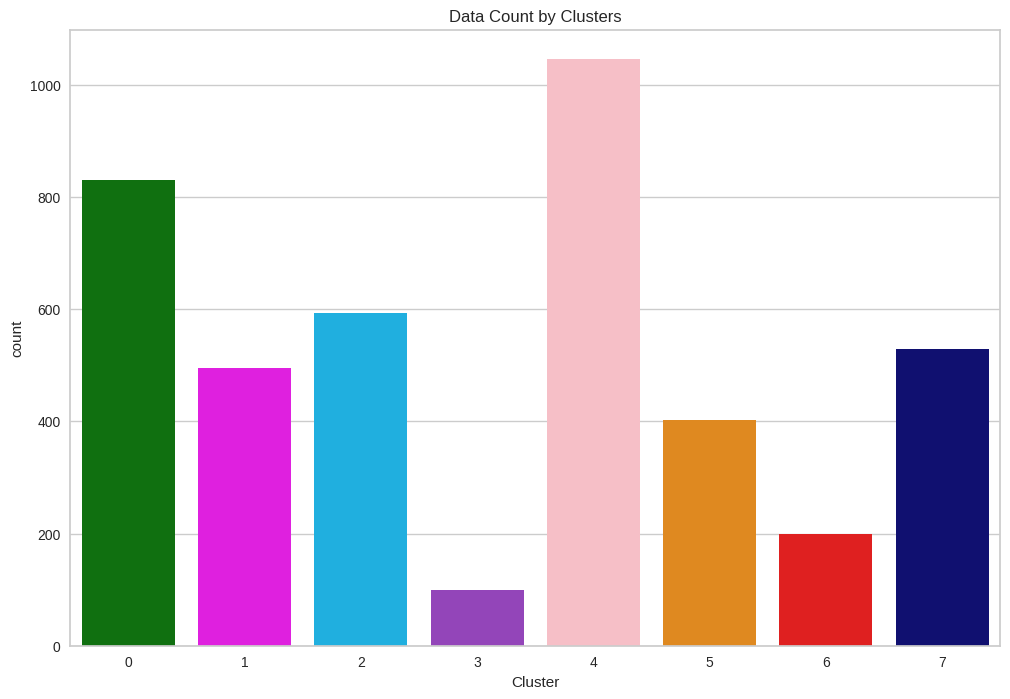

In [14]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df['label'], hue=df['label'], legend=False, palette=palette)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

---

<center>
    
## Cluster Analysis

</center>

---

**Play Time vs Clusters**

/tmp/ipykernel_1998703/3701893586.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['minplaytime'], y=df['maxplaytime'], hue='label_str', legend=True, palette=palette)


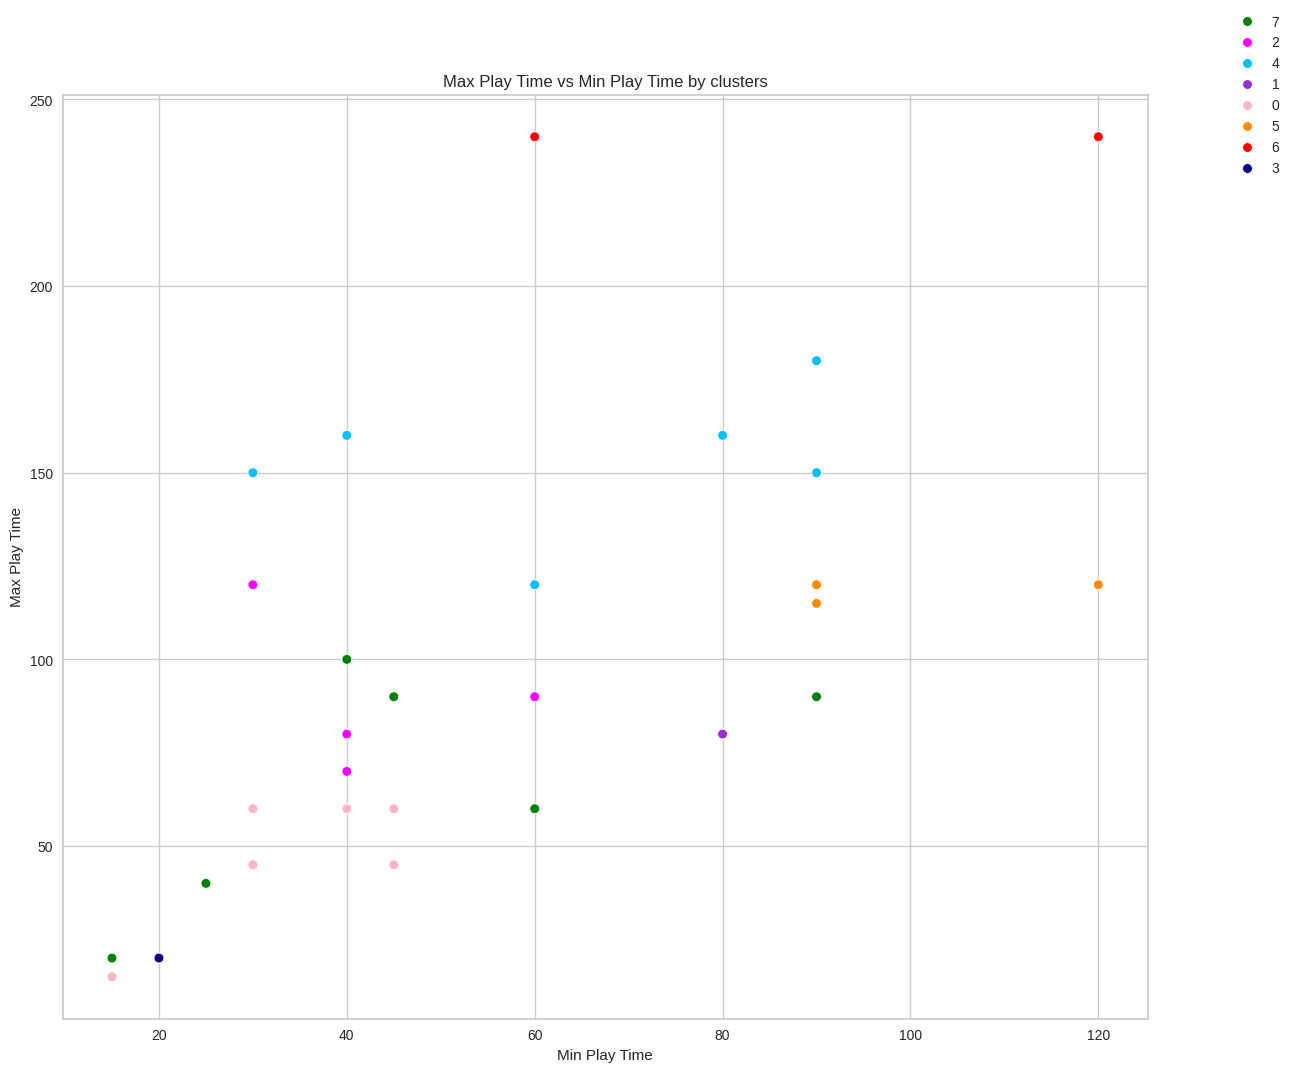

In [15]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['minplaytime'], y=df['maxplaytime'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Max Play Time vs Min Play Time by clusters')

# Add axis labels
ax.set_xlabel('Min Play Time')
ax.set_ylabel('Max Play Time')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**# of Player vs Clusters**

/tmp/ipykernel_1998703/3724949077.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['min_players'], y=df['max_players'], hue='label_str', legend=True, palette=palette)


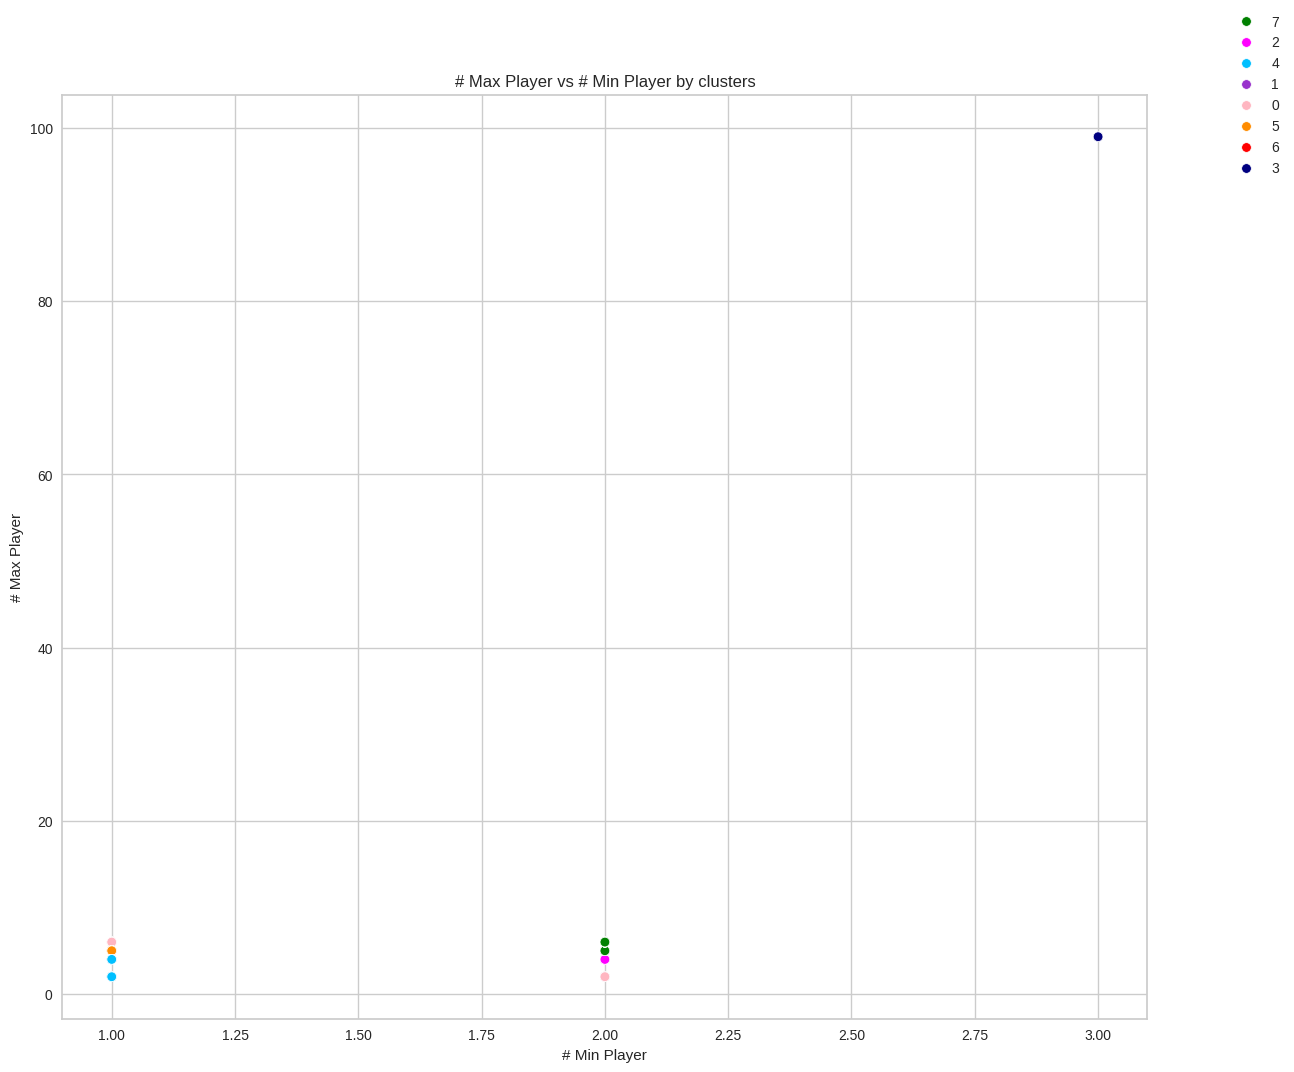

In [16]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['min_players'], y=df['max_players'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'# Max Player vs # Min Player by clusters')

# Add axis labels
ax.set_xlabel('# Min Player')
ax.set_ylabel('# Max Player')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Age vs Rating Average**

/tmp/ipykernel_1998703/703315945.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['ratings_avg'], y=df['age'], hue='label_str', legend=True, palette=palette)


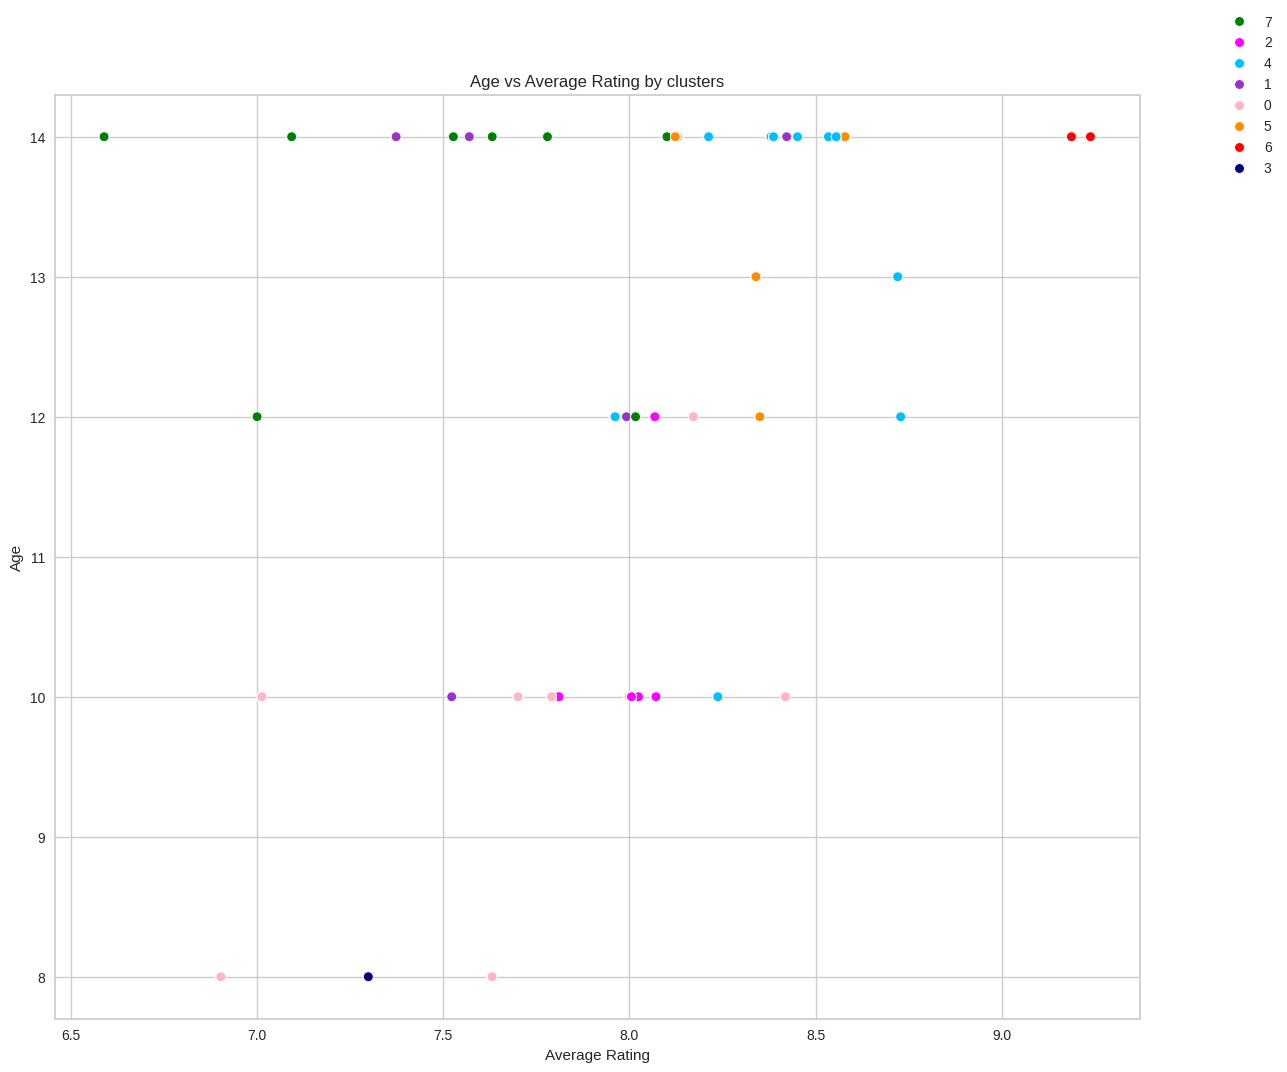

In [46]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['ratings_avg'], y=df['age'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Age vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Average Rating')
ax.set_ylabel('Age')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Sentiment vs Rating Average**

/tmp/ipykernel_1998703/3928715605.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['Sentiment'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)


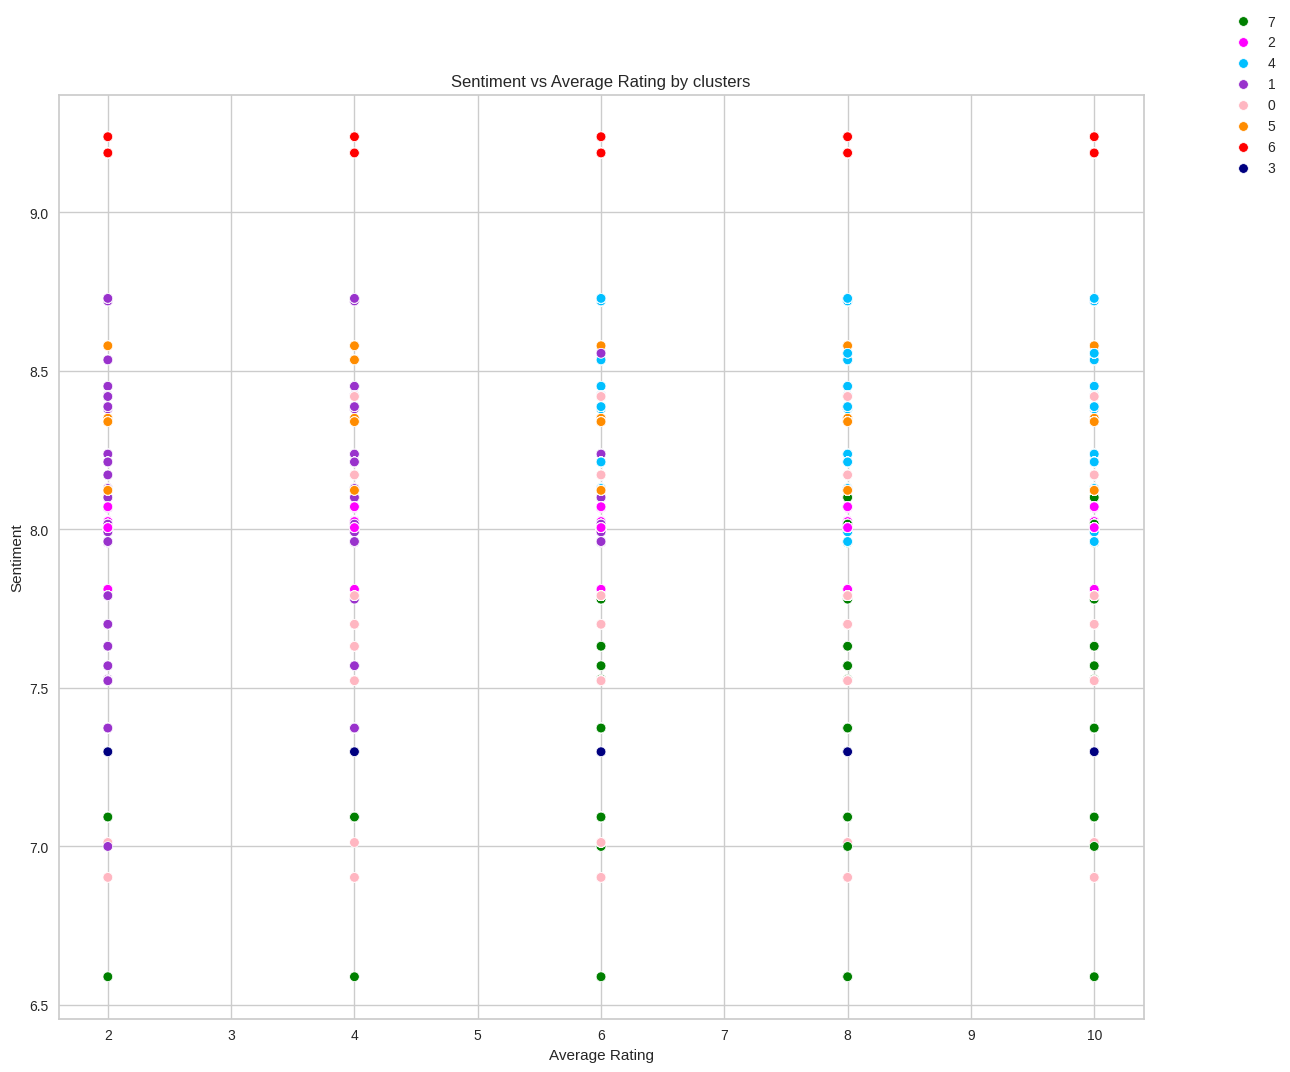

In [18]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['Sentiment'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Sentiment vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Average Rating')
ax.set_ylabel('Sentiment')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Language vs Rating Average**

/tmp/ipykernel_1998703/1038124742.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x=df['lang'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)


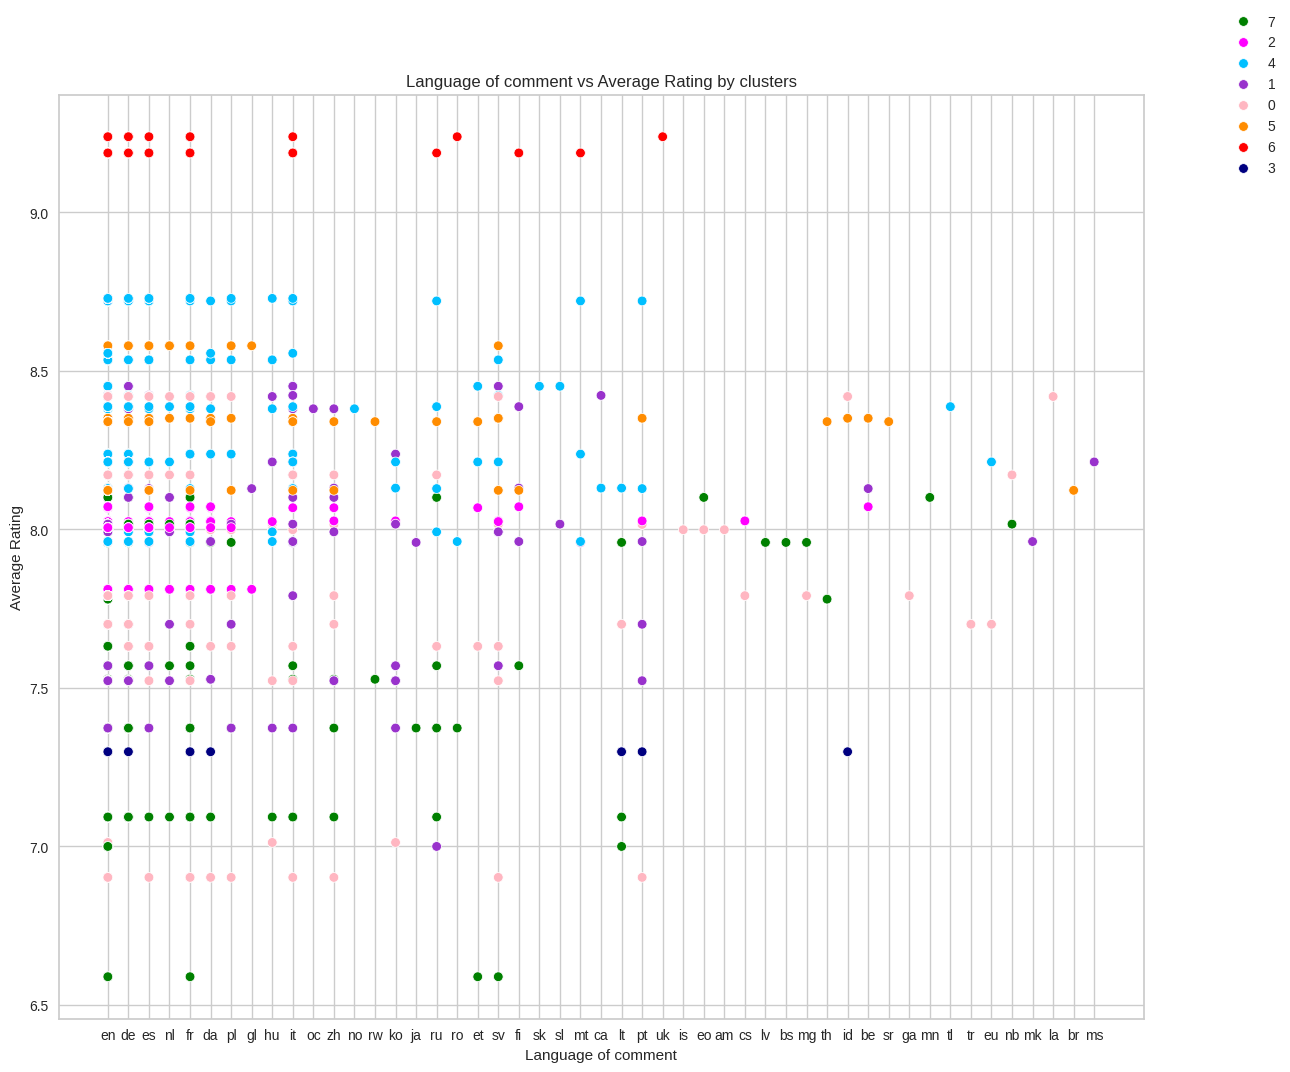

In [19]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x=df['lang'], y=df['ratings_avg'], hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Language of comment vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Language of comment')
ax.set_ylabel('Average Rating')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Wish Count vs Rating Average**

/tmp/ipykernel_1998703/112354155.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x='count_wishing', y='ratings_avg', hue='label_str', legend=True, palette=palette)


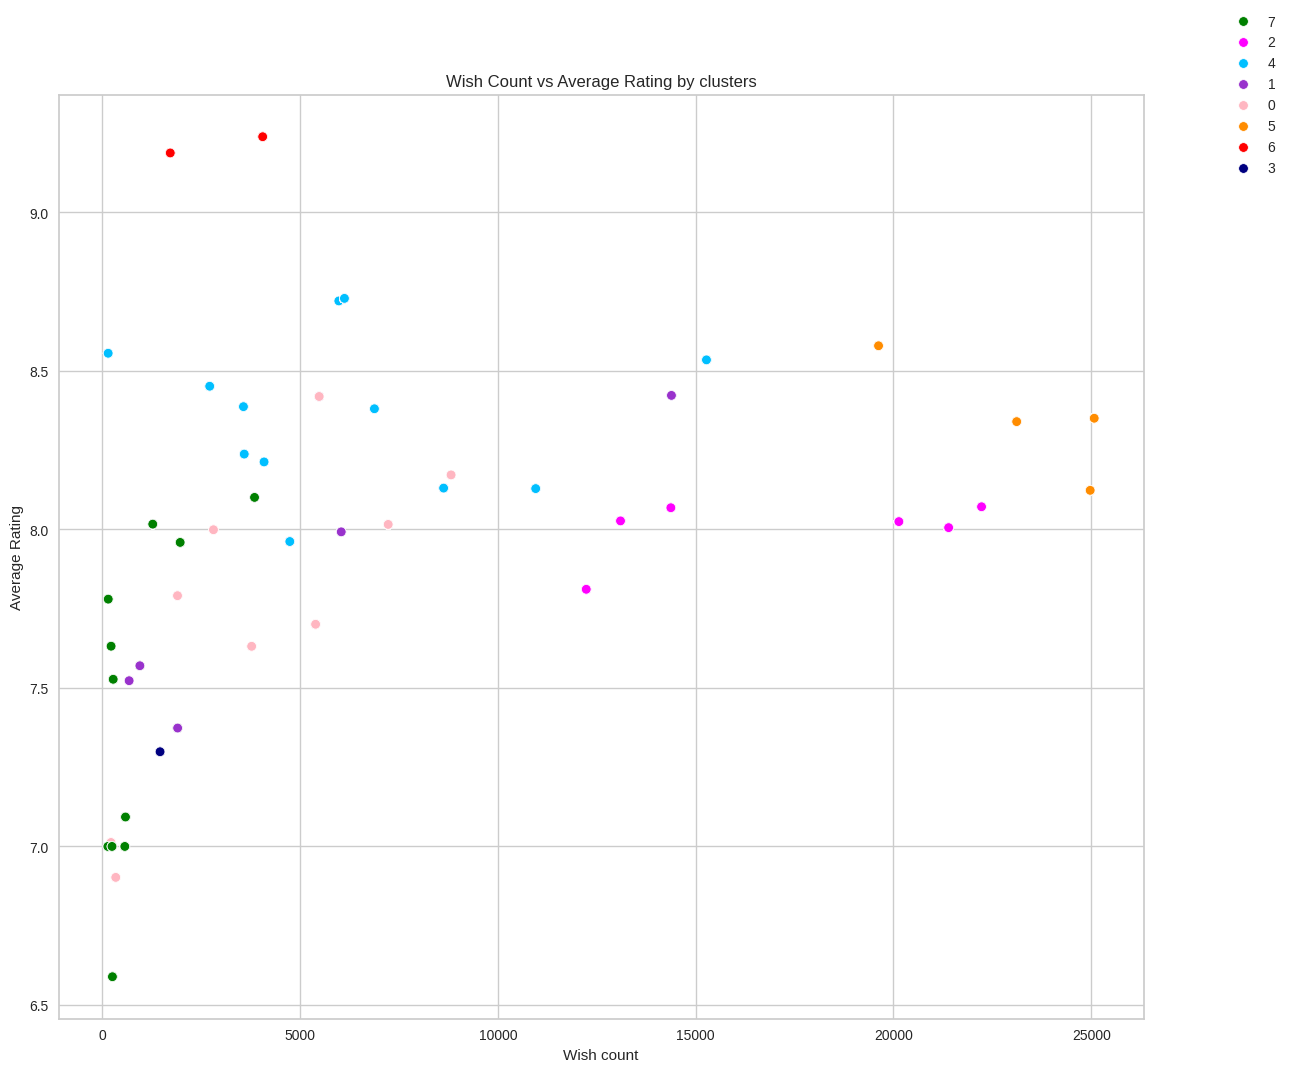

In [20]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x='count_wishing', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Wish Count vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Wish count')
ax.set_ylabel('Average Rating')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Wanting Count vs Rating Average**

/tmp/ipykernel_1998703/201869863.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(df, x='count_wanting', y='ratings_avg', hue='label_str', legend=True, palette=palette)


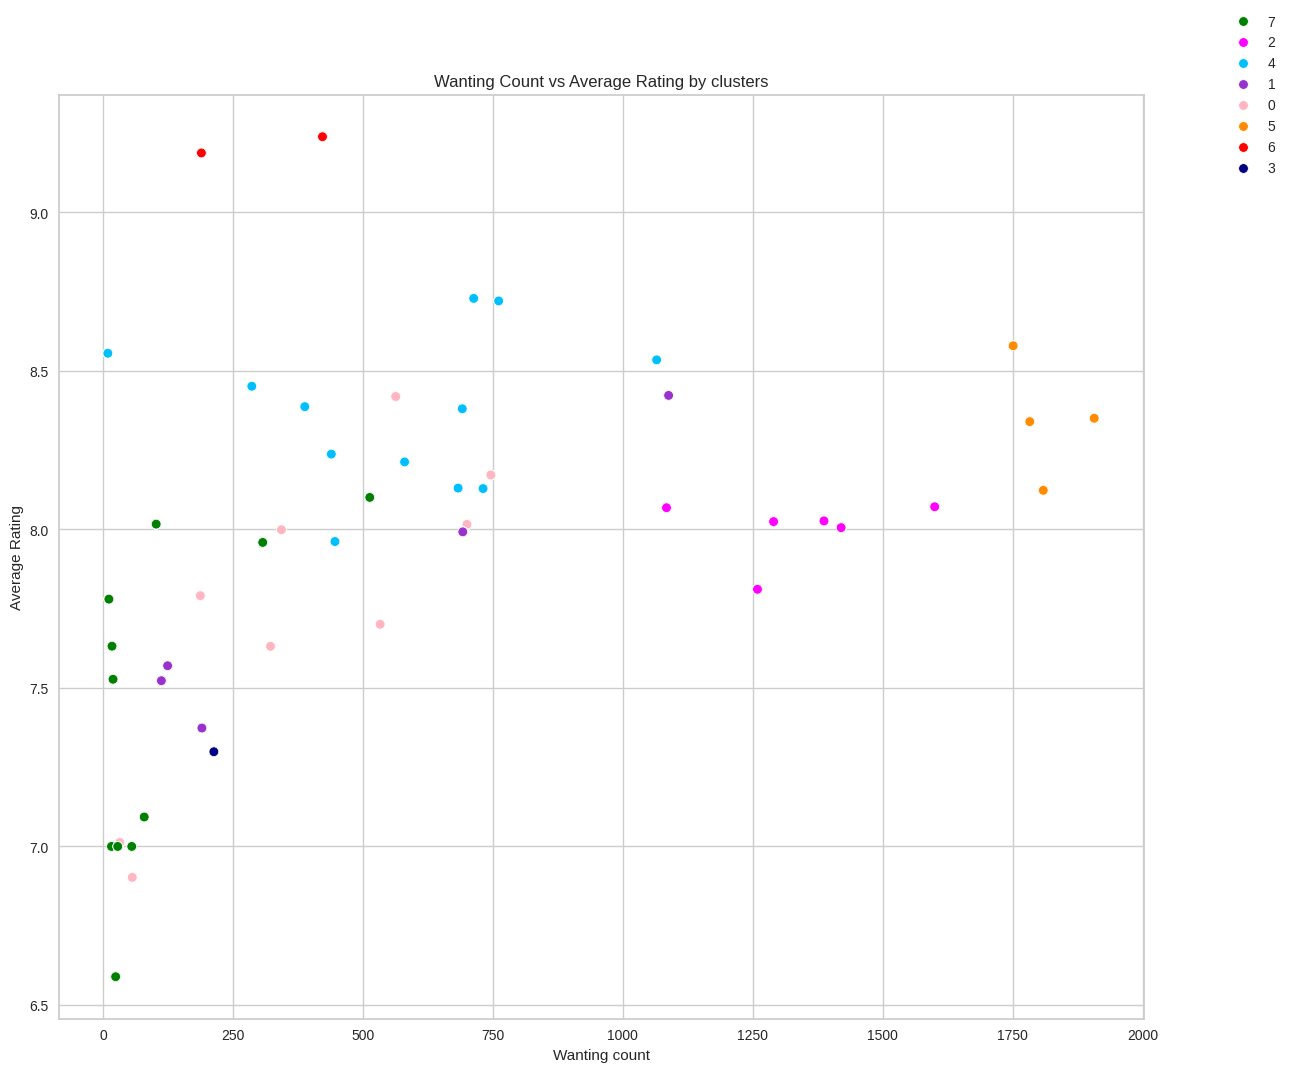

In [21]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(df, x='count_wanting', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Wanting Count vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Wanting count')
ax.set_ylabel('Average Rating')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Rating vs category**

In [22]:
tmp = df['categories'].str.split(',', expand=True)
tmp

,0,1,2,3,4,5
0,Animals,Environmental,Territory Building,None,None,None
1,Animals,Environmental,Territory Building,None,None,None
2,Animals,Environmental,Territory Building,None,None,None
3,Animals,Environmental,Territory Building,None,None,None
4,Animals,Environmental,Territory Building,None,None,None
...,...,...,...,...,...,...
4193,Civilization,Dice,Economic,Exploration,Science Fiction,None
4194,Civilization,Dice,Economic,Exploration,Science Fiction,None
4195,Civilization,Dice,Economic,Exploration,Science Fiction,None
4196,Civilization,Dice,Economic,Exploration,Science Fiction,None


In [23]:
# Initialize an empty list to store the new rows
new_rows = []

# Iterate over each row of the DataFrame
for idx , row in tmp.iterrows():
    
    # Get the non-None values in the row
    non_none_values = [value for value in row if value is not None]
    
    # For each non-None value, create a new row with the value and add it to the new_rows list
    for value in non_none_values:
        new_row = df.iloc[idx].copy()
        new_row['Category_expanded'] = value
        new_rows.append(new_row)

new_tmp_df = pd.DataFrame(new_rows)

new_tmp_df

,username,rating,comment,gamename,mechanics,min_players,max_players,minplaytime,maxplaytime,age,ratings_avg,count_wanting,count_wishing,description,categories,lang,Sentiment,label,label_str,Category_expanded
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Animals
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Environmental
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Territory Building
1,Corwin007,NaN,UPCOMING\n\nArk Nova lite?,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6,7,7,Animals
1,Corwin007,NaN,UPCOMING\n\nArk Nova lite?,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6,7,7,Environmental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Civilization
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Dice
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Economic
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Exploration


In [24]:
col = list(tmp[0].unique())

col.extend(tmp[1].unique())
col.extend(tmp[2].unique())
col.extend(tmp[3].unique())
col.extend(tmp[4].unique())
col.extend(tmp[5].unique())

col = list(set(col))
col.remove(None)
col

['Negotiation',
 'Video Game Theme',
 'Animals',
 'Dice',
 'Novel-based',
 'Card Game',
 'Space Exploration',
 'Territory Building',
 'Age of Reason',
 'Nautical',
 'Political',
 'City Building',
 'Deduction',
 'Adventure',
 'Puzzle',
 'Wargame',
 'Mythology',
 'Number',
 'Post-Napoleonic',
 'Pirates',
 'Movies / TV / Radio theme',
 'Industry / Manufacturing',
 'Civilization',
 'Medieval',
 'Educational',
 'Horror',
 'Exploration',
 'No category',
 'Murder / Mystery',
 'Collectible Components',
 'Bluffing',
 'Aviation / Flight',
 'Transportation',
 'Environmental',
 'Racing',
 'Sports',
 'Medical',
 'Economic',
 'Trains',
 'Abstract Strategy',
 'Fighting',
 'Science Fiction',
 'Fantasy']

In [25]:
onehot_df = pd.DataFrame(0, index=tmp.index, columns=col)
onehot_df

,Negotiation,Video Game Theme,Animals,Dice,Novel-based,Card Game,Space Exploration,Territory Building,Age of Reason,Nautical,...,Environmental,Racing,Sports,Medical,Economic,Trains,Abstract Strategy,Fighting,Science Fiction,Fantasy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
for idx, row in tmp.iterrows():
    for value in row.dropna():
        if str(value) in onehot_df.columns:
            onehot_df.at[idx, str(value)] = 1

In [27]:
onehot_df

,Negotiation,Video Game Theme,Animals,Dice,Novel-based,Card Game,Space Exploration,Territory Building,Age of Reason,Nautical,...,Environmental,Racing,Sports,Medical,Economic,Trains,Abstract Strategy,Fighting,Science Fiction,Fantasy
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4194,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4195,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4196,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
onehot_df['label_str'] = df['label_str']

In [29]:
onehot_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4188,4189,4190,4191,4192,4193,4194,4195,4196,4197
Negotiation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Video Game Theme,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animals,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Dice,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Novel-based,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Card Game,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Space Exploration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Territory Building,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Age of Reason,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nautical,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_1998703/437981359.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(new_tmp_df, x='Category_expanded', y='ratings_avg', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_1998703/437981359.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)


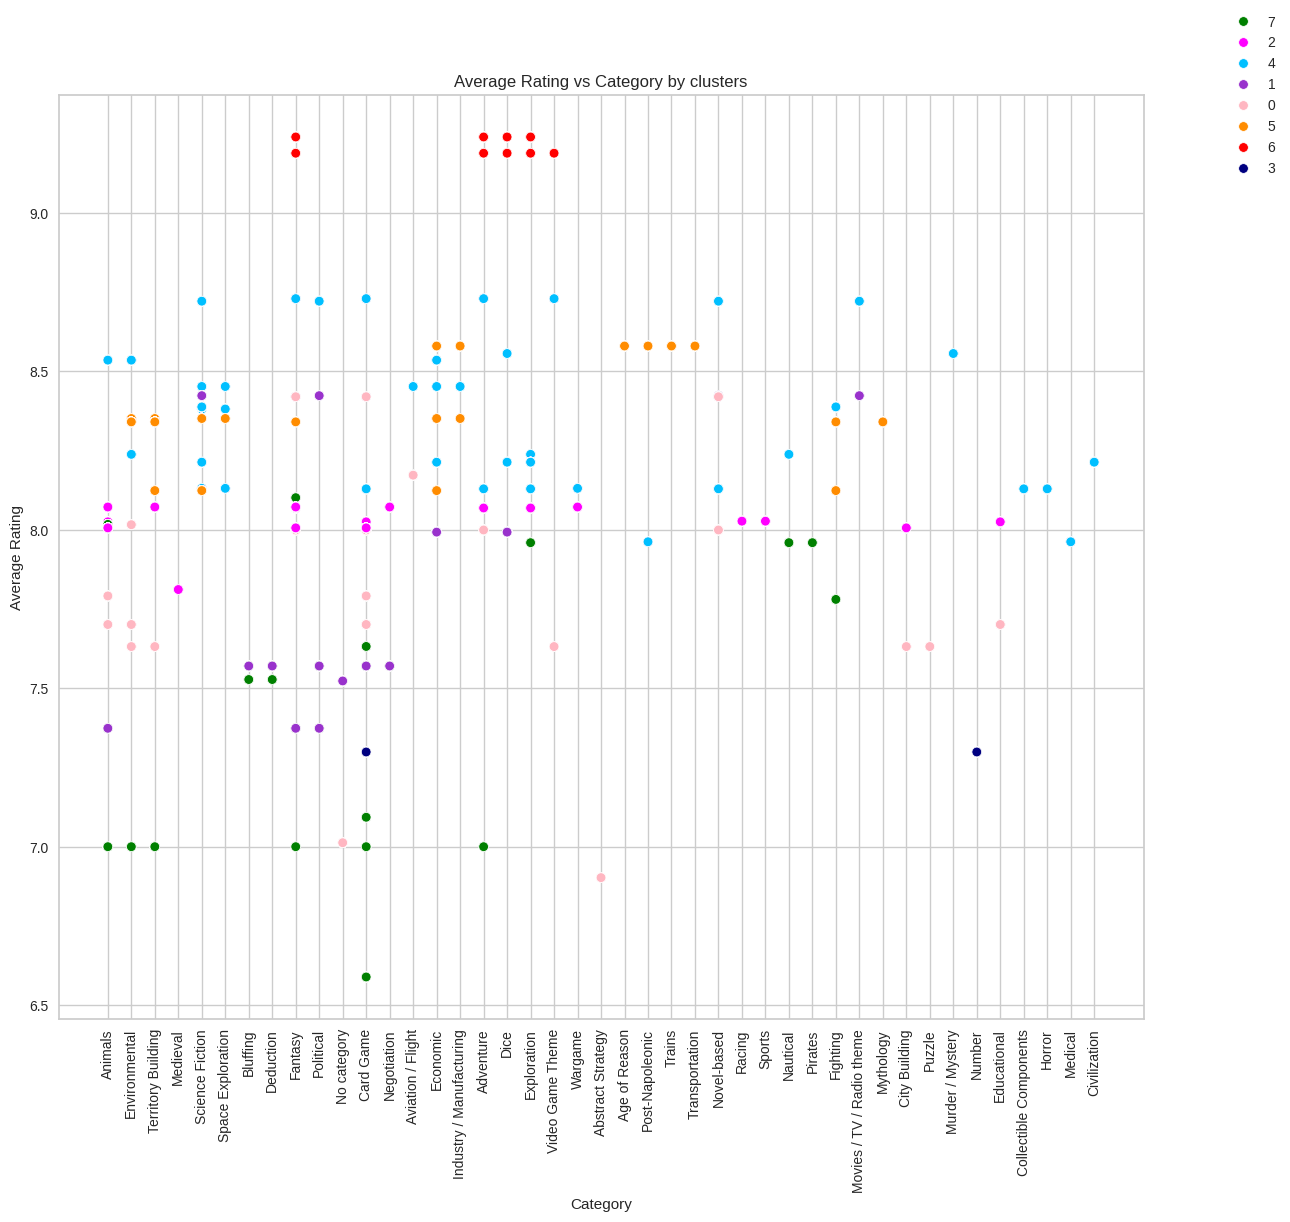

In [30]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(new_tmp_df, x='Category_expanded', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Average Rating vs Category by clusters')

# Add axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Average Rating')

#
ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_1998703/812177017.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(new_tmp_df, x='Category_expanded', y='age', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_1998703/812177017.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)


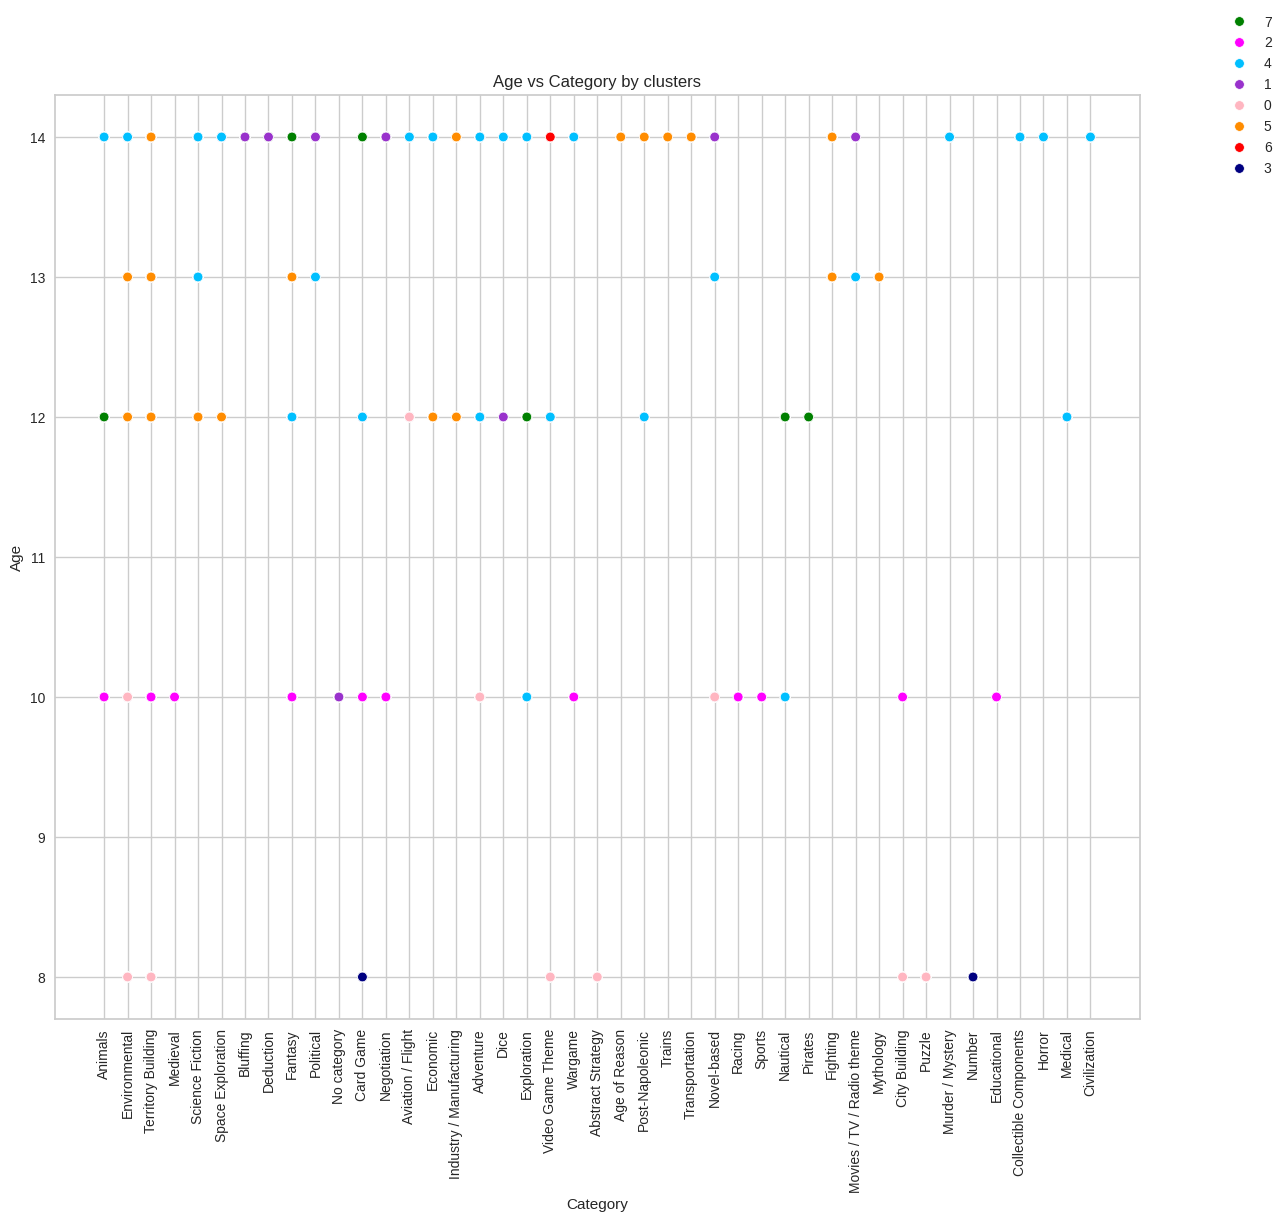

In [31]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(new_tmp_df, x='Category_expanded', y='age', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Age vs Category by clusters')

# Add axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Age')

#
ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_1998703/310679190.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(new_tmp_df, x='Category_expanded', y='lang', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_1998703/310679190.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)


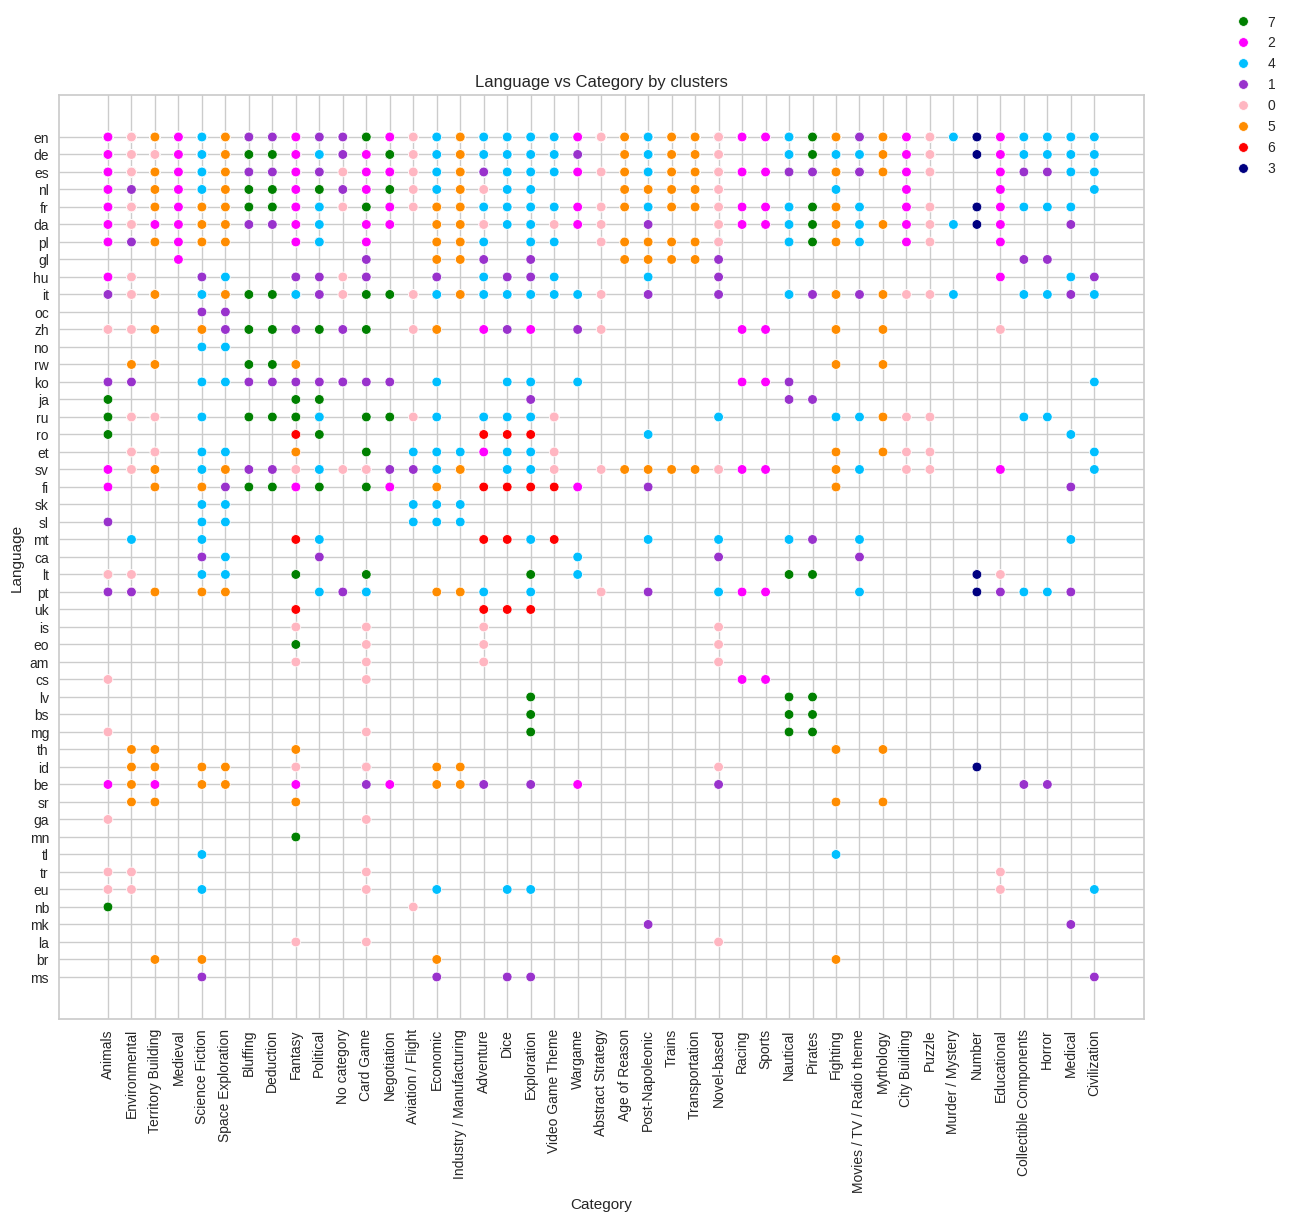

In [48]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(new_tmp_df, x='Category_expanded', y='lang', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Language vs Category by clusters')

# Add axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Language')

#
ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_1998703/2411441312.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(new_tmp_df, x='ratings_avg', y='maxplaytime', hue='label_str', legend=True, palette=palette)


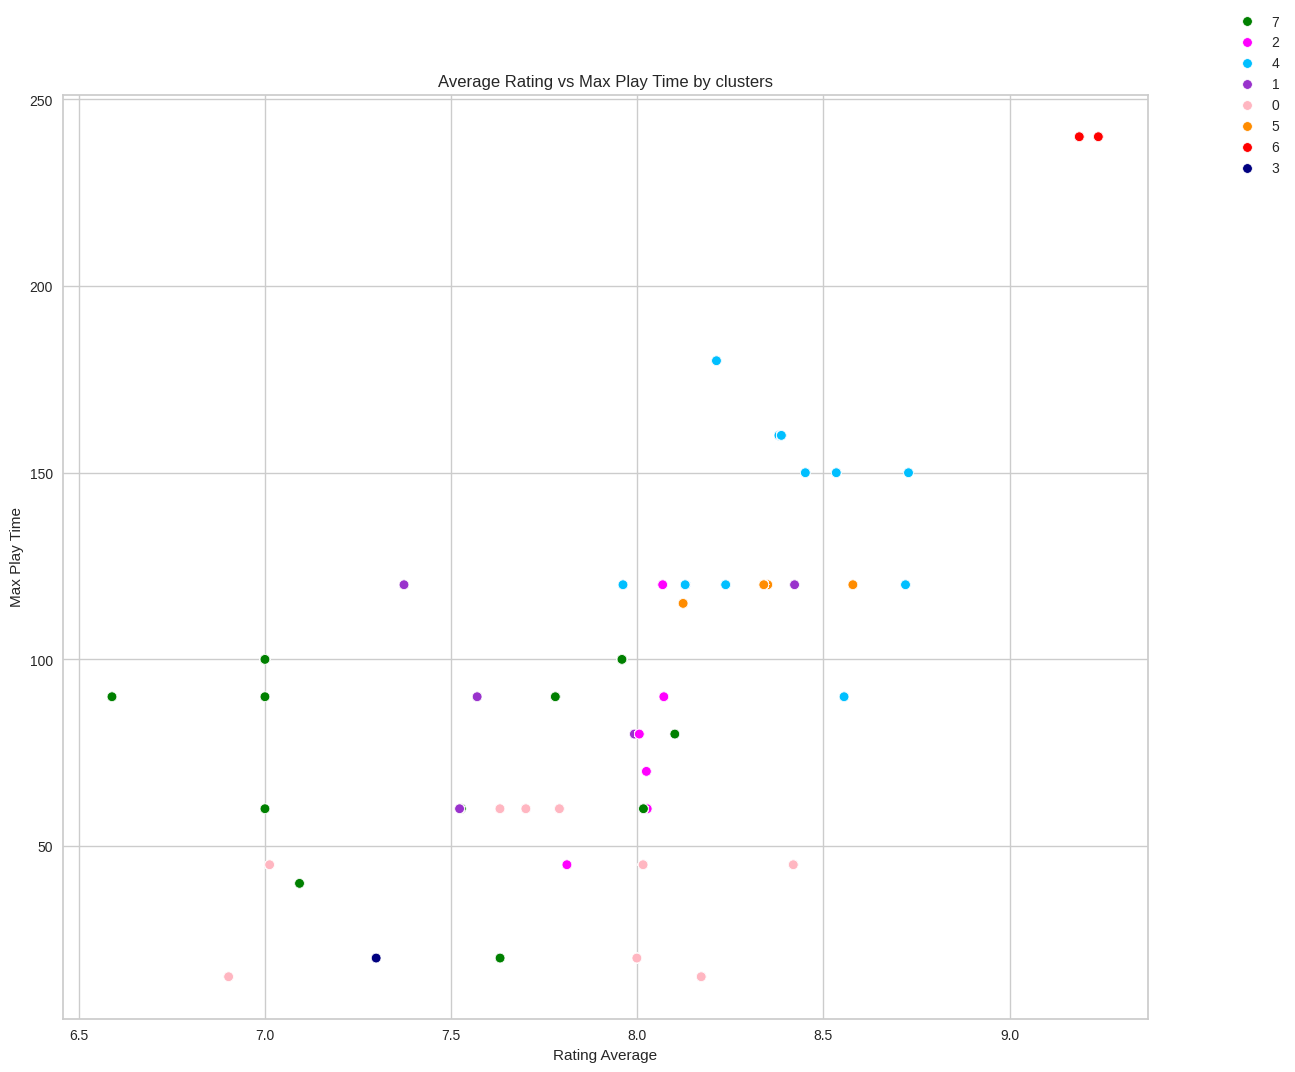

In [32]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(new_tmp_df, x='ratings_avg', y='maxplaytime', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Average Rating vs Max Play Time by clusters')

# Add axis labels
ax.set_xlabel('Rating Average')
ax.set_ylabel('Max Play Time')

#
#ax.set_xticklabels(new_tmp_df['Category_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


**Rating vs mechanics**

In [33]:
tmp = df['mechanics'].str.split(',', expand=True)
tmp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Action Queue,Hand Management,Hexagon Grid,Open Drafting,Set Collection,Solo / Solitaire Game,Tile Placement,Variable Set-up,None,None,None,None,None,None,None,None,None,None,None
1,Action Queue,Hand Management,Hexagon Grid,Open Drafting,Set Collection,Solo / Solitaire Game,Tile Placement,Variable Set-up,None,None,None,None,None,None,None,None,None,None,None
2,Action Queue,Hand Management,Hexagon Grid,Open Drafting,Set Collection,Solo / Solitaire Game,Tile Placement,Variable Set-up,None,None,None,None,None,None,None,None,None,None,None
3,Action Queue,Hand Management,Hexagon Grid,Open Drafting,Set Collection,Solo / Solitaire Game,Tile Placement,Variable Set-up,None,None,None,None,None,None,None,None,None,None,None
4,Action Queue,Hand Management,Hexagon Grid,Open Drafting,Set Collection,Solo / Solitaire Game,Tile Placement,Variable Set-up,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,Area Movement,Dice Rolling,Events,Hand Management,Income,Modular Board,Open Drafting,Pattern Building,Tech Trees / Tech Tracks,Track Movement,Variable Set-up,None,None,None,None,None,None,None,None
4194,Area Movement,Dice Rolling,Events,Hand Management,Income,Modular Board,Open Drafting,Pattern Building,Tech Trees / Tech Tracks,Track Movement,Variable Set-up,None,None,None,None,None,None,None,None
4195,Area Movement,Dice Rolling,Events,Hand Management,Income,Modular Board,Open Drafting,Pattern Building,Tech Trees / Tech Tracks,Track Movement,Variable Set-up,None,None,None,None,None,None,None,None
4196,Area Movement,Dice Rolling,Events,Hand Management,Income,Modular Board,Open Drafting,Pattern Building,Tech Trees / Tech Tracks,Track Movement,Variable Set-up,None,None,None,None,None,None,None,None


In [34]:
# Initialize an empty list to store the new rows
new_rows = []

# Iterate over each row of the DataFrame
for idx , row in tmp.iterrows():
    
    # Get the non-None values in the row
    non_none_values = [value for value in row if value is not None]
    
    # For each non-None value, create a new row with the value and add it to the new_rows list
    for value in non_none_values:
        new_row = df.iloc[idx].copy()
        new_row['Mechanics_expanded'] = value
        new_rows.append(new_row)

new_tmp_df2 = pd.DataFrame(new_rows)

new_tmp_df2

,username,rating,comment,gamename,mechanics,min_players,max_players,minplaytime,maxplaytime,age,ratings_avg,count_wanting,count_wishing,description,categories,lang,Sentiment,label,label_str,Mechanics_expanded
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Action Queue
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Hand Management
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Hexagon Grid
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Open Drafting
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,Set Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Open Drafting
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Pattern Building
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Tech Trees / Tech Tracks
4197,Citadel,NaN,Nice Civ-lite minus the combat element. Tons o...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,Track Movement


/tmp/ipykernel_1998703/707898693.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(new_tmp_df2, x='Mechanics_expanded', y='ratings_avg', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_1998703/707898693.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tmp_df2['Mechanics_expanded'].unique(),rotation=90)


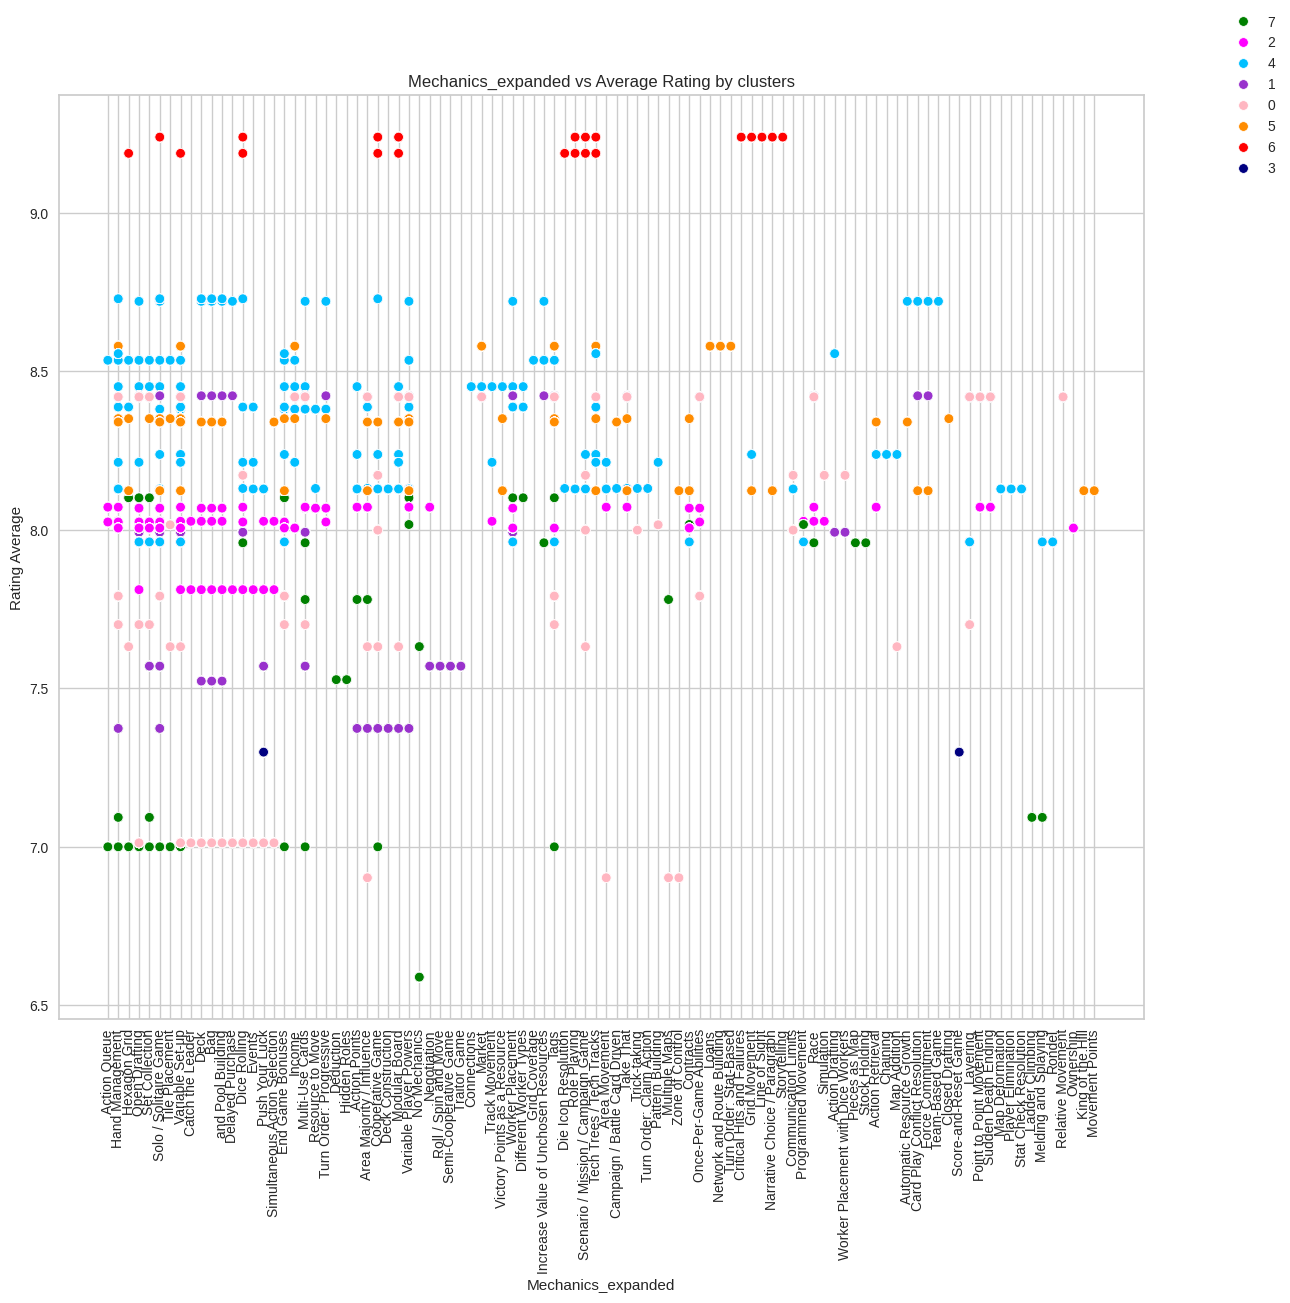

In [35]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(new_tmp_df2, x='Mechanics_expanded', y='ratings_avg', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Mechanics_expanded vs Average Rating by clusters')

# Add axis labels
ax.set_xlabel('Mechanics_expanded')
ax.set_ylabel('Rating Average')

#
ax.set_xticklabels(new_tmp_df2['Mechanics_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_1998703/2310493390.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(new_tmp_df2, x='Mechanics_expanded', y='age', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_1998703/2310493390.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tmp_df2['Mechanics_expanded'].unique(),rotation=90)


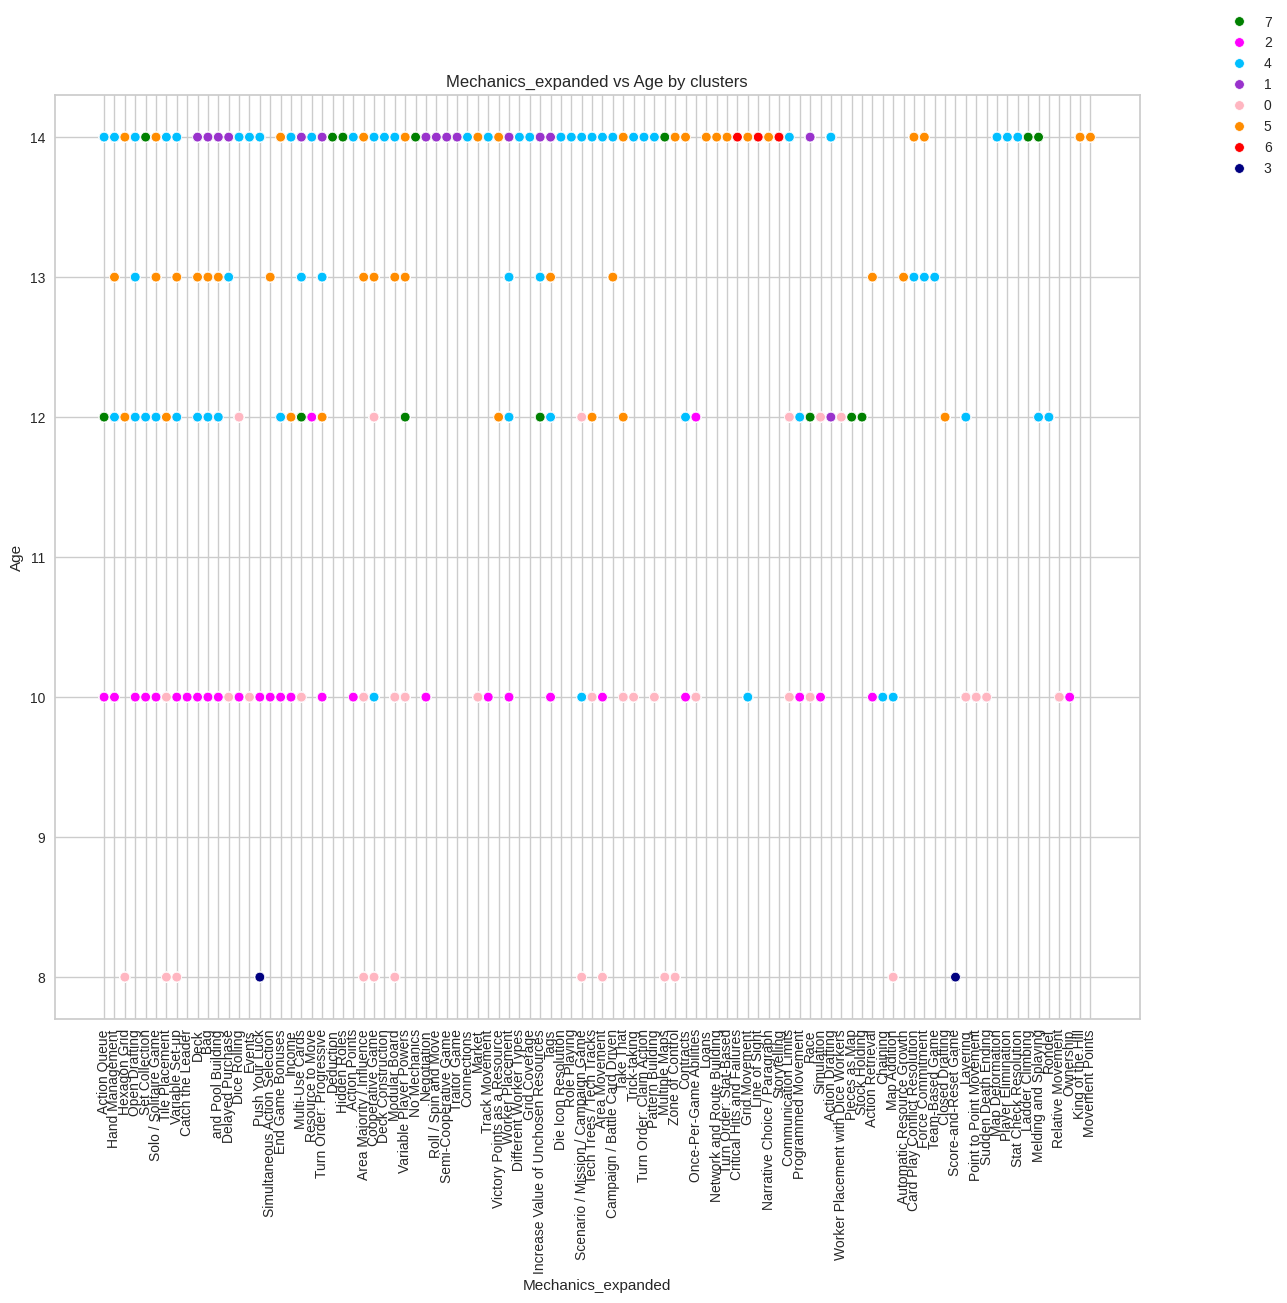

In [36]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(new_tmp_df2, x='Mechanics_expanded', y='age', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Mechanics_expanded vs Age by clusters')

# Add axis labels
ax.set_xlabel('Mechanics_expanded')
ax.set_ylabel('Age')

#
ax.set_xticklabels(new_tmp_df2['Mechanics_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_1998703/1001708042.py:6: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(new_tmp_df2, x='Mechanics_expanded', y='lang', hue='label_str', legend=True, palette=palette)
/tmp/ipykernel_1998703/1001708042.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tmp_df2['Mechanics_expanded'].unique(),rotation=90)


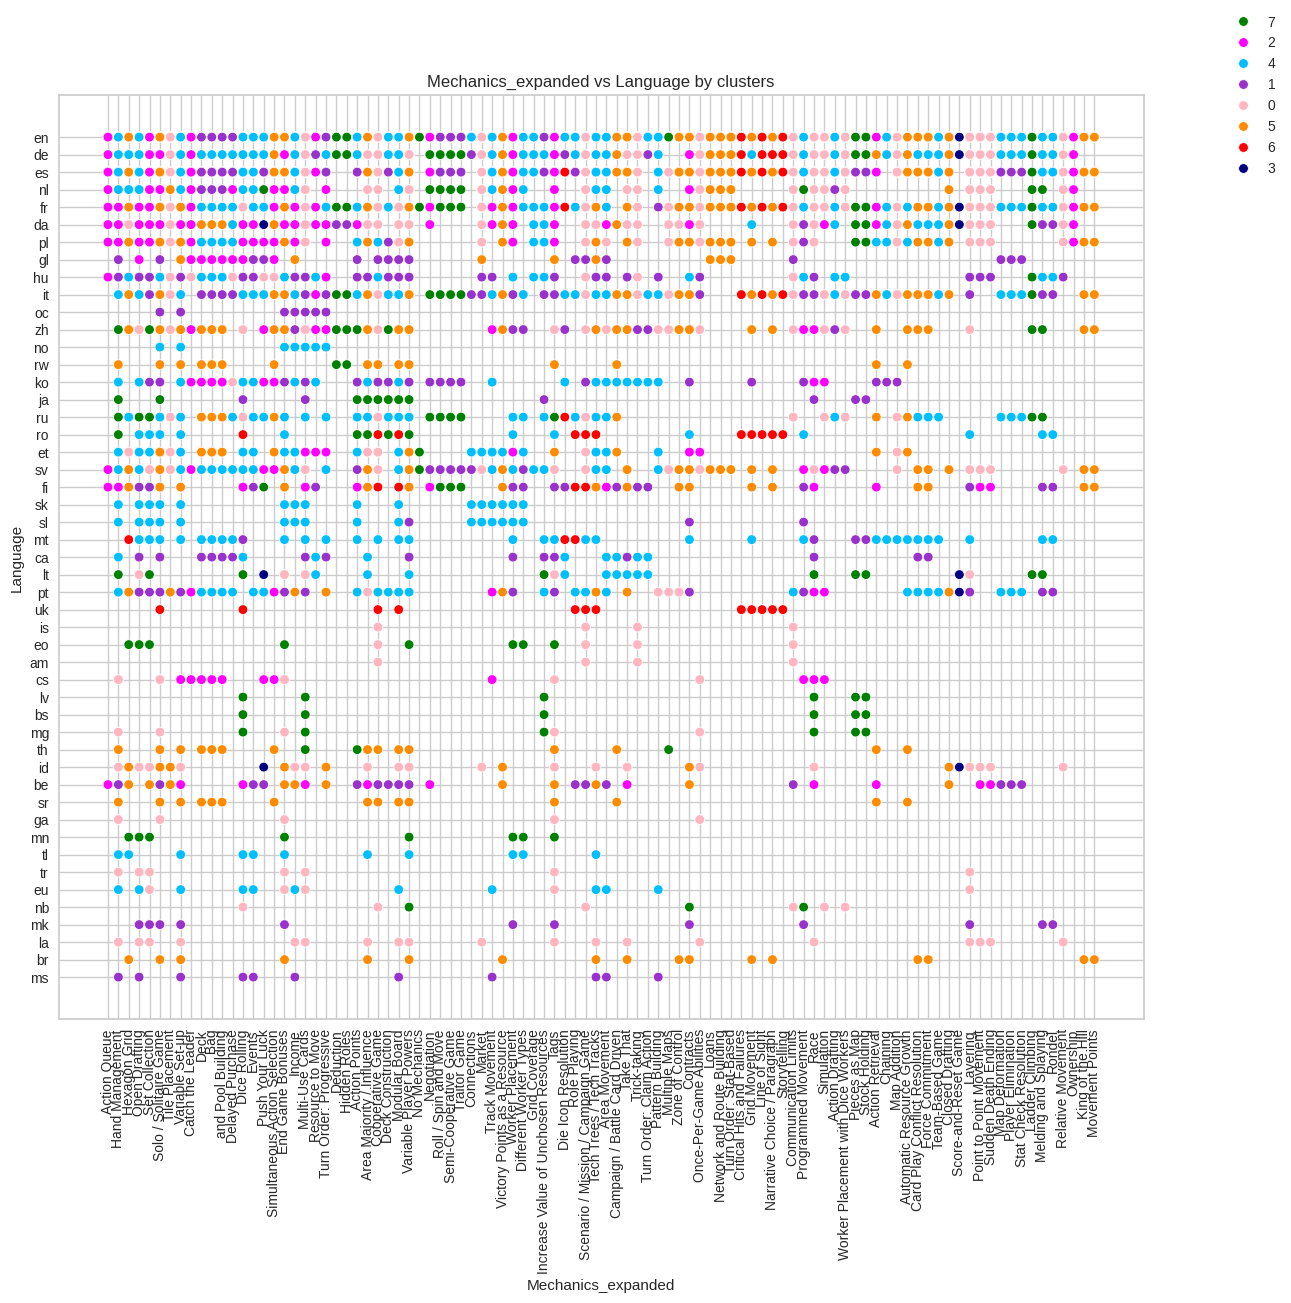

In [49]:
# Create figure and adjust size
plt.figure(figsize=(14,12))


# Create count plot
ax = sns.scatterplot(new_tmp_df2, x='Mechanics_expanded', y='lang', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'Mechanics_expanded vs Language by clusters')

# Add axis labels
ax.set_xlabel('Mechanics_expanded')
ax.set_ylabel('Language')

#
ax.set_xticklabels(new_tmp_df2['Mechanics_expanded'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_1998703/4165717200.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='age', legend=False, hue='label', palette=palette)


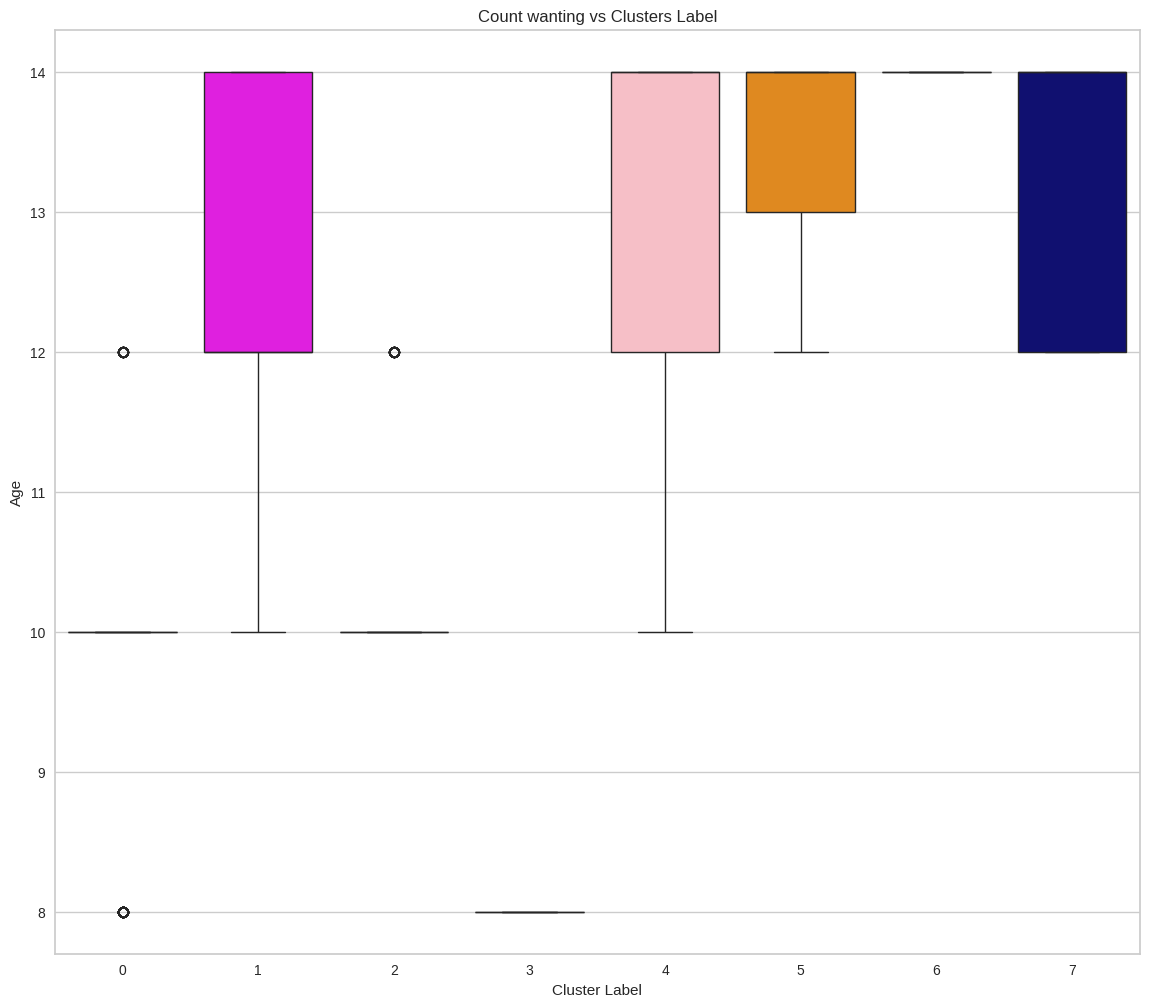

In [37]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='age', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Count wanting vs Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Age')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_1998703/2774217047.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='max_players', legend=False, hue='label', palette=palette)


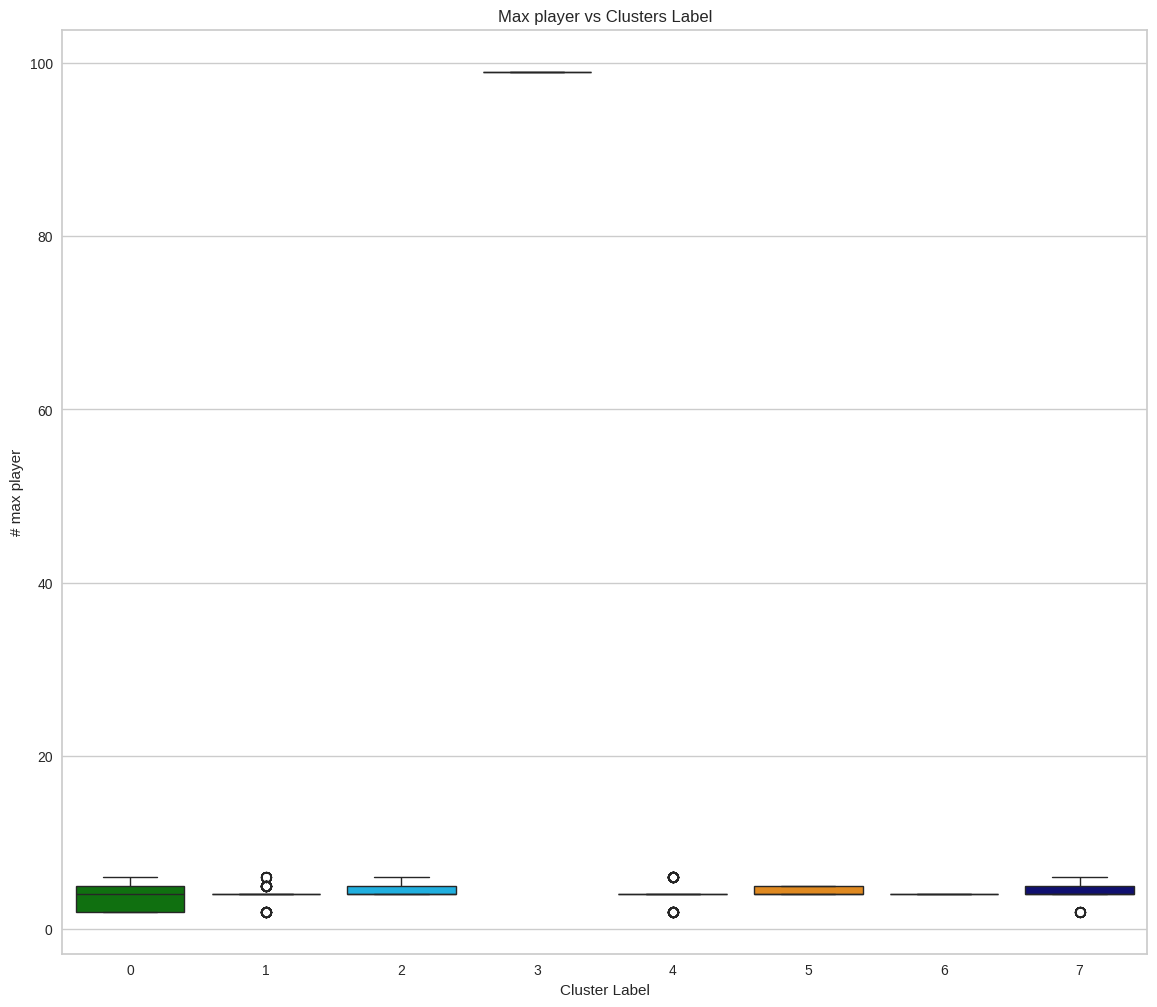

In [38]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='max_players', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Max player vs Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('# max player')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_1998703/3500043067.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='minplaytime', legend=False, hue='label', palette=palette)


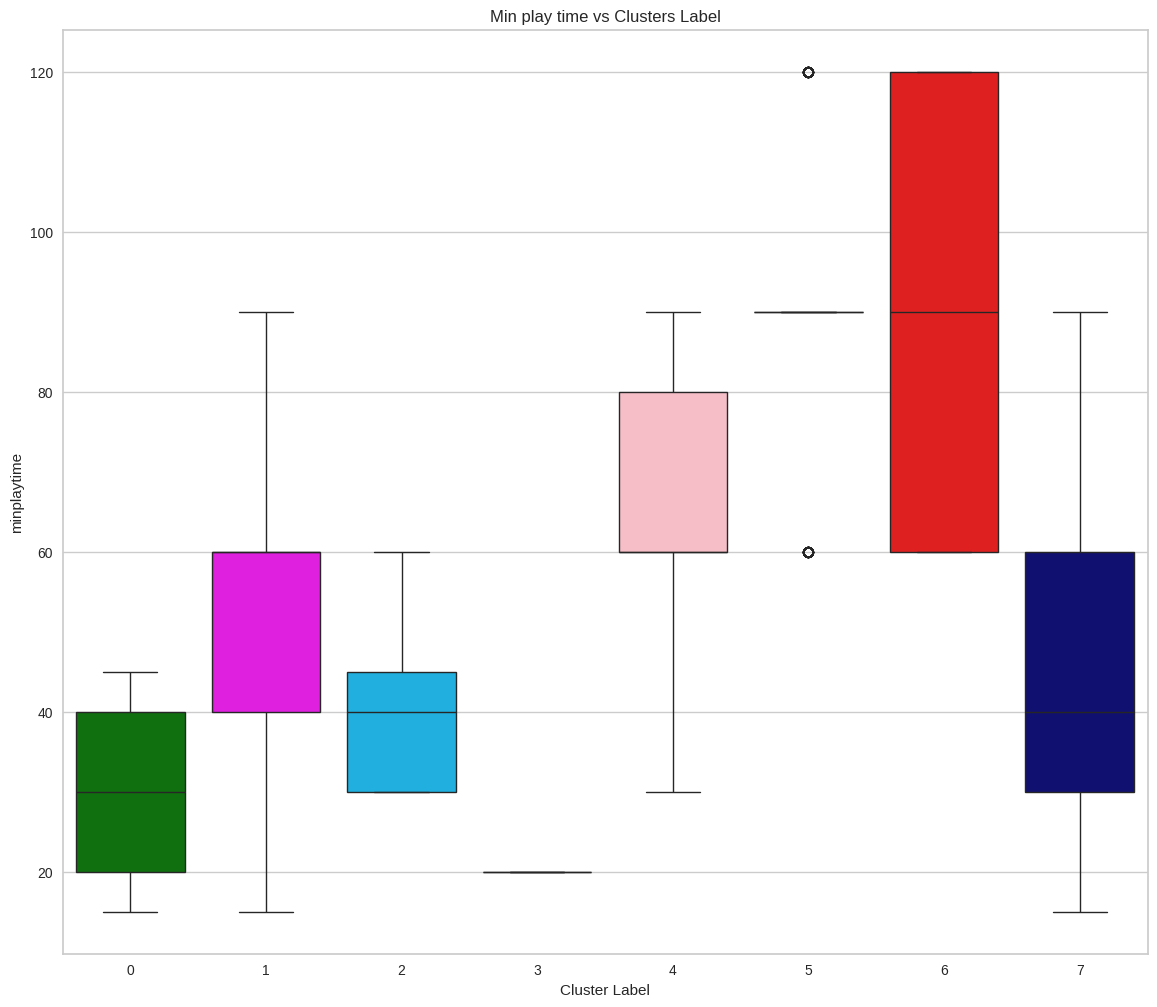

In [39]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='minplaytime', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Min play time vs Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('minplaytime')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_1998703/2553601254.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='maxplaytime', legend=False, hue='label', palette=palette)


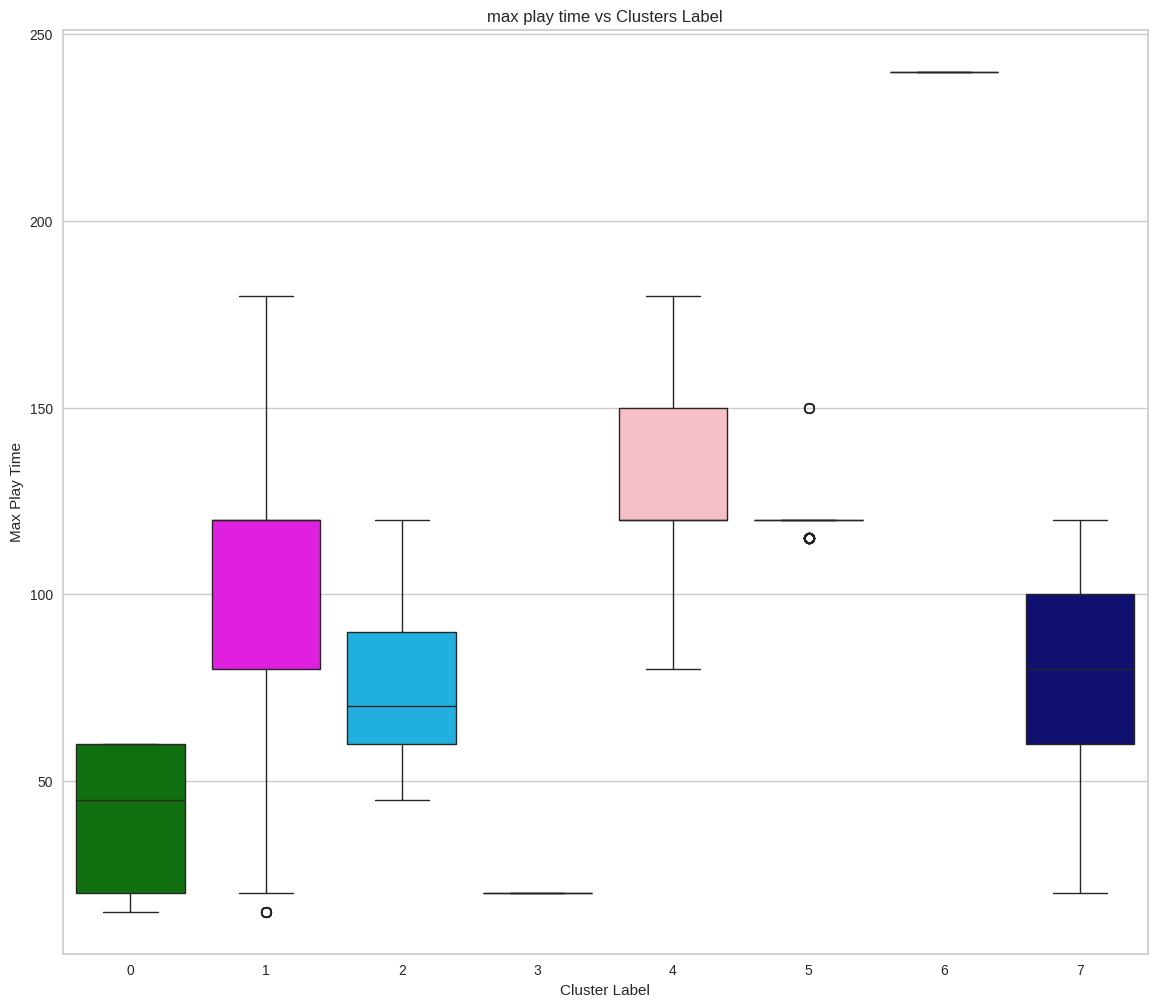

In [40]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='maxplaytime', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'max play time vs Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Max Play Time')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_1998703/1346608673.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='Sentiment', legend=False, hue='label', palette=palette)


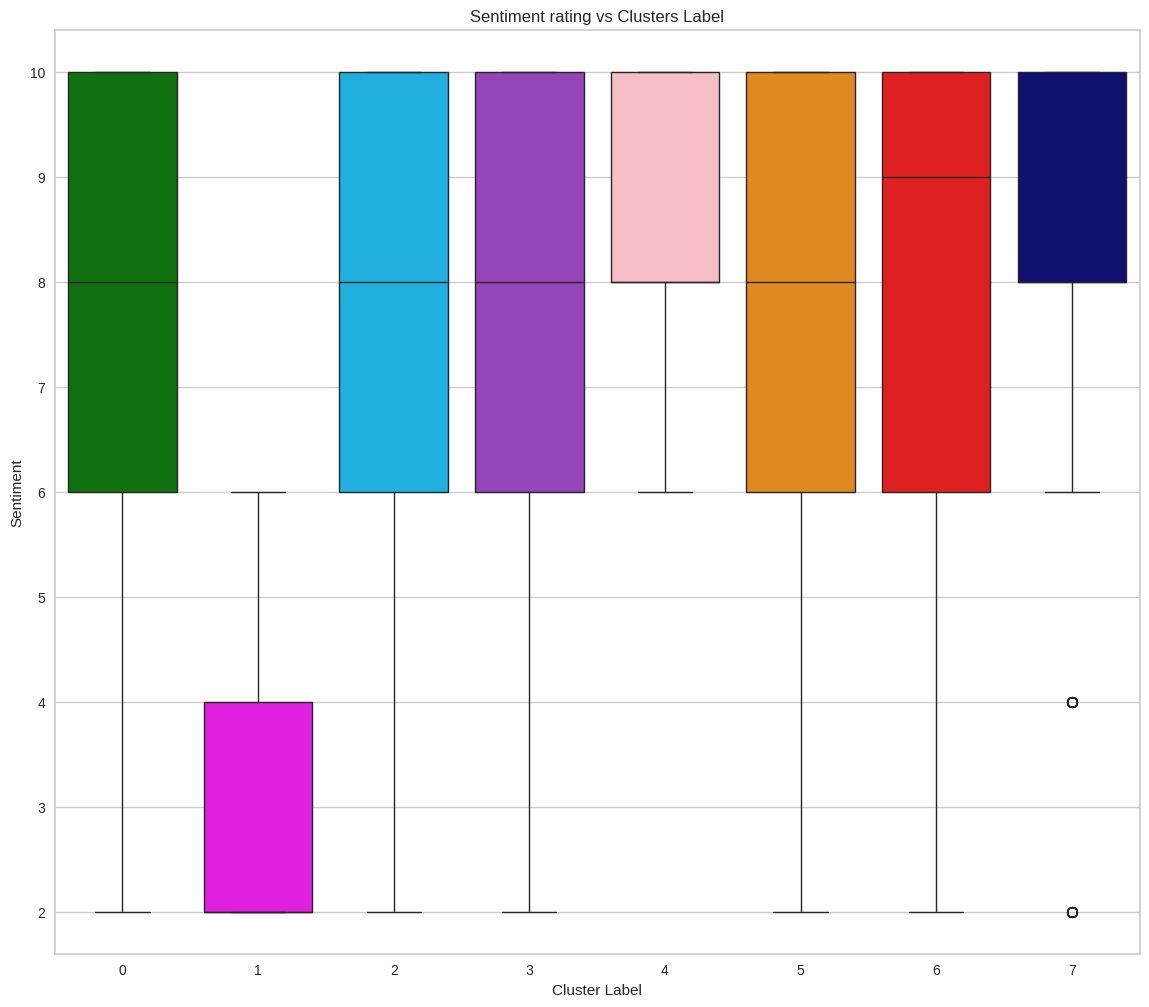

In [41]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='Sentiment', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Sentiment rating vs Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Sentiment')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


/tmp/ipykernel_1998703/3375492764.py:7: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.boxplot(df, x='label', y='ratings_avg', legend=False, hue='label', palette=palette)


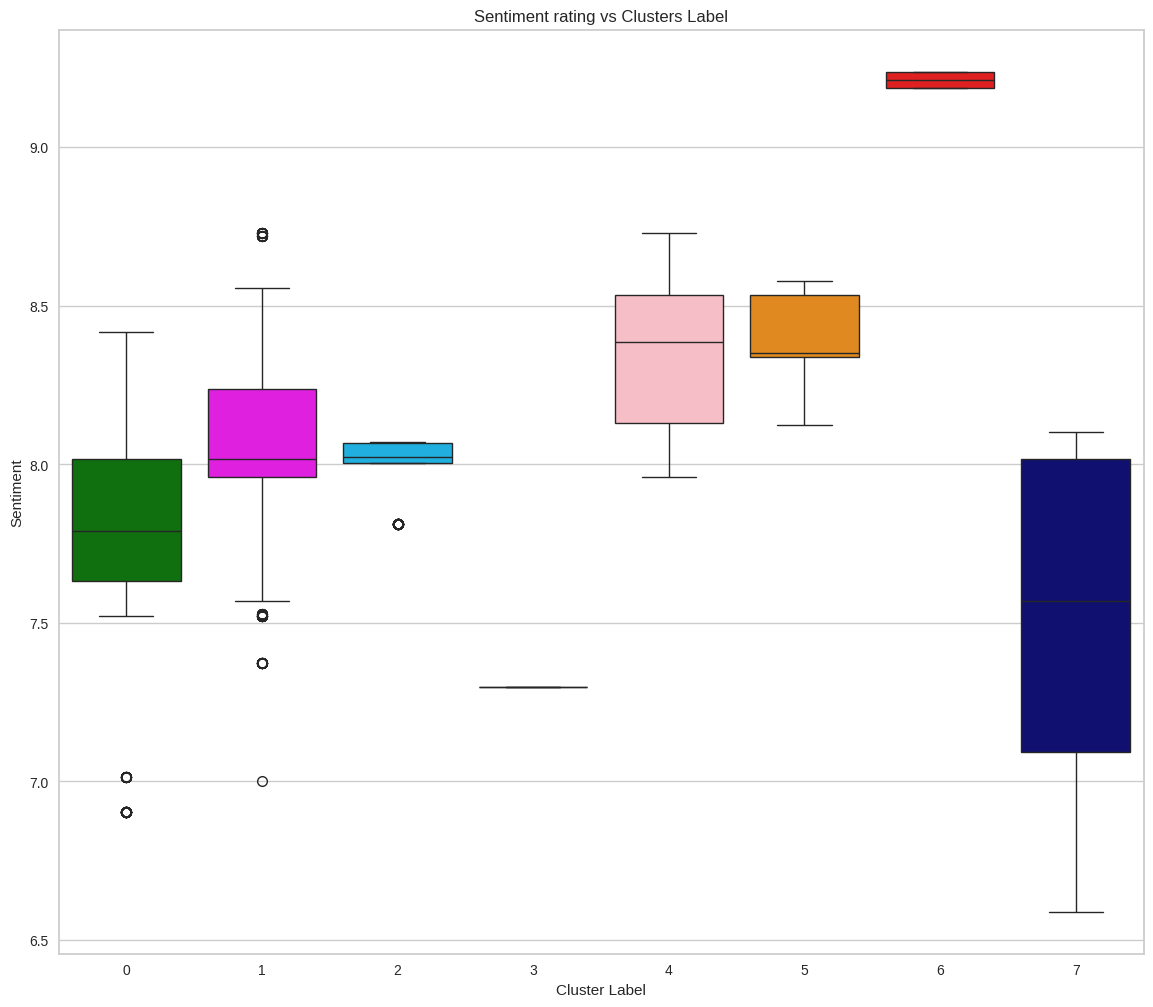

In [42]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

#sorted_labels = df.groupby("count_wanting")["EF Score"].mean().sort_values().index

# Create count plot
ax = sns.boxplot(df, x='label', y='ratings_avg', legend=False, hue='label', palette=palette)

# Add title
ax.set_title(f'Sentiment rating vs Clusters Label')

# Add axis labels
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Sentiment')

# Save plot
#plt.savefig('../graph/Clusters_Kmeans.png')

# Show plot
plt.show()


---

<center>
    
## Results

</center>

---

**2D PCA plot with clusters**

In [57]:
pca = PCA(n_components=2)

df[['PC1', 'PC2']] = pca.fit_transform(X)

In [58]:
df

,username,rating,comment,gamename,mechanics,min_players,max_players,minplaytime,maxplaytime,age,...,count_wanting,count_wishing,description,categories,lang,Sentiment,label,label_str,PC1,PC2
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,-7628.099841,-117.061131
1,Corwin007,NaN,UPCOMING\n\nArk Nova lite?,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6,7,7,-7628.099855,-117.062583
2,IronTarkles,NaN,New game from ark nova designer,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,10,7,7,-7628.099827,-117.059679
3,MarkyX,NaN,I'm very interested in this one. I like the co...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,-7628.099841,-117.061131
4,mikamikomi,1.0,3 artist yet still use stock photos? oh yeah,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6,7,7,-7628.099855,-117.062583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,chicagometh,4.8,"4...'Not so good, but could play again' by BGG...",Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,-4079.993119,163.740534
4194,Chris Coyote,NaN,Birthday 2025,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,10,4,4,-4079.993105,163.741986
4195,Chris_P85,9.0,Played a half Game at Spiel 24,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,2,1,1,-4079.993160,163.736179
4196,Chutch1035,5.0,I love Feld games and I love Civ games. When I...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,-4079.993119,163.740534


/tmp/ipykernel_1998703/3558617702.py:5: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  ax = sns.scatterplot(data=df, x='PC1', y='PC2', hue='label_str', palette=palette)


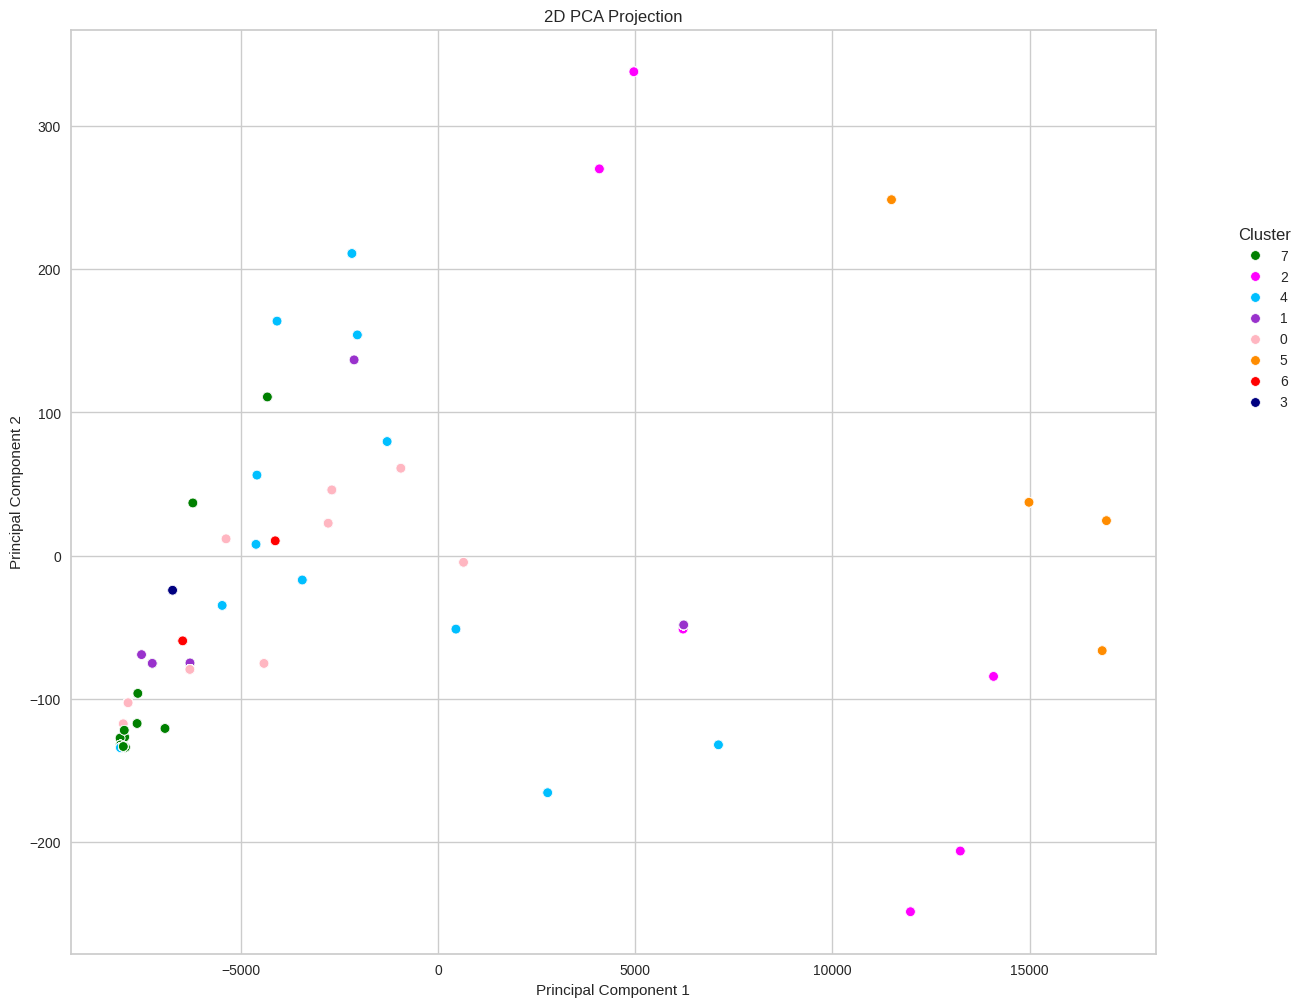

In [79]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

# Create scatter plot
ax = sns.scatterplot(data=df, x='PC1', y='PC2', hue='label_str', palette=palette)

# Add title
plt.title('2D PCA Projection')

# Add axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjust legend position
plt.legend(title="Cluster", loc='upper center', bbox_to_anchor=(1.1, 0.8), ncol=1)

# Save plot
plt.savefig('../graph/PCA_2d.png')

# Show plot
plt.show()

**3D PCA plot with clusters**

In [63]:
pca = PCA(n_components=3)

df[['PC1', 'PC2', 'PC3']] = pca.fit_transform(X)

In [64]:
df

,username,rating,comment,gamename,mechanics,min_players,max_players,minplaytime,maxplaytime,age,...,count_wishing,description,categories,lang,Sentiment,label,label_str,PC1,PC2,PC3
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,-7628.099841,-117.061131,7.092915
1,Corwin007,NaN,UPCOMING\n\nArk Nova lite?,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6,7,7,-7628.099855,-117.062583,7.092539
2,IronTarkles,NaN,New game from ark nova designer,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,10,7,7,-7628.099827,-117.059679,7.093292
3,MarkyX,NaN,I'm very interested in this one. I like the co...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,8,7,7,-7628.099841,-117.061131,7.092915
4,mikamikomi,1.0,3 artist yet still use stock photos? oh yeah,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,...,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en,6,7,7,-7628.099855,-117.062583,7.092539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,chicagometh,4.8,"4...'Not so good, but could play again' by BGG...",Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,-4079.993119,163.740534,88.320960
4194,Chris Coyote,NaN,Birthday 2025,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,10,4,4,-4079.993105,163.741986,88.321336
4195,Chris_P85,9.0,Played a half Game at Spiel 24,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,2,1,1,-4079.993160,163.736179,88.319831
4196,Chutch1035,5.0,I love Feld games and I love Civ games. When I...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,...,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en,8,4,4,-4079.993119,163.740534,88.320960


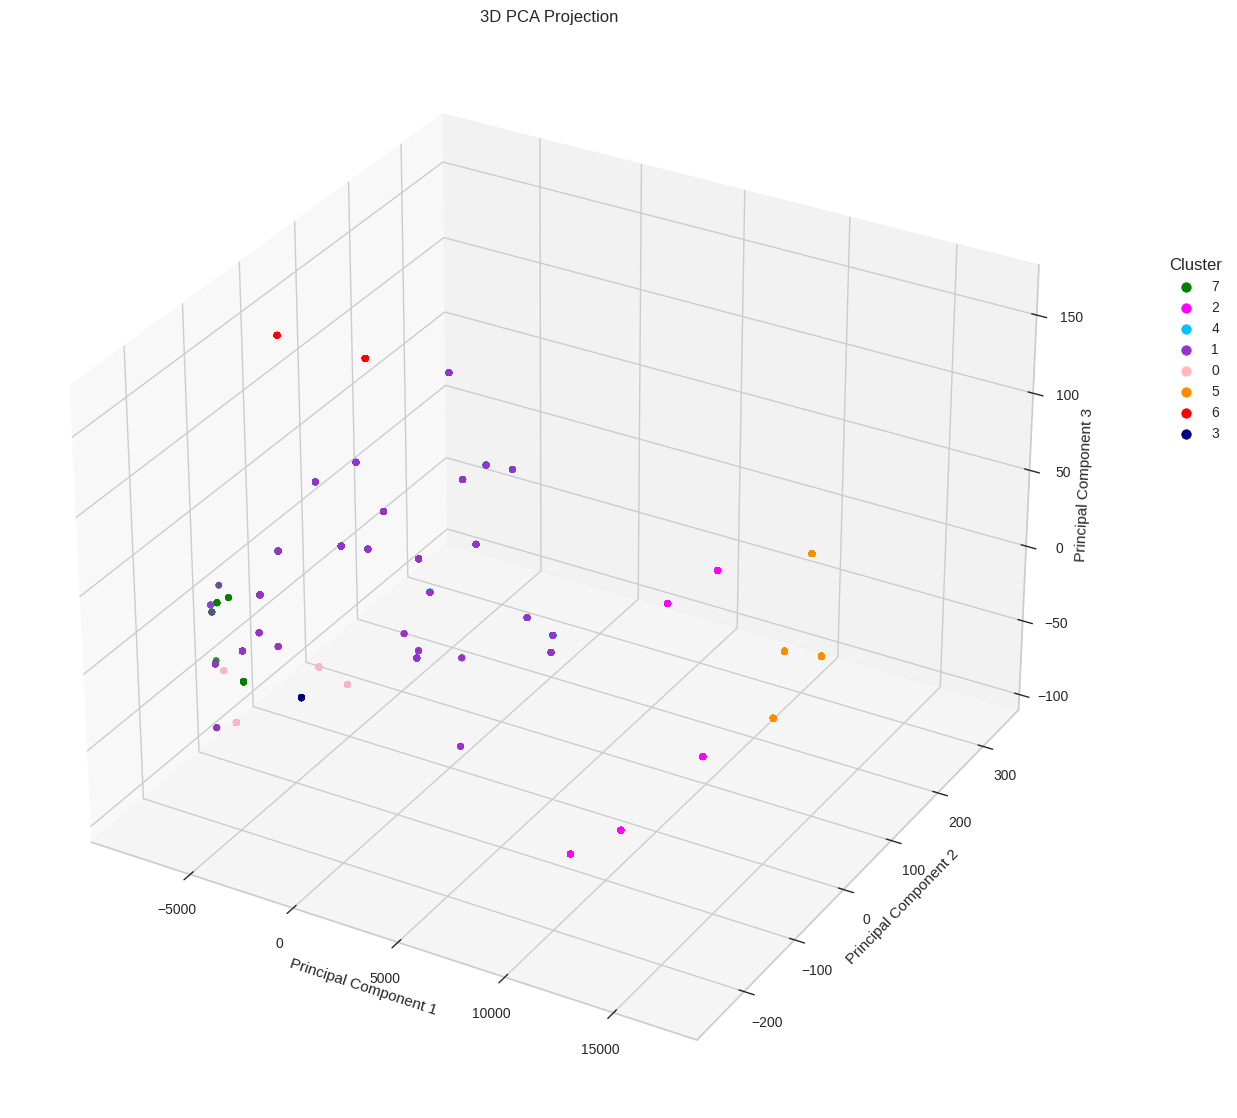

In [78]:
# Create figure and adjust size
fig = plt.figure(figsize=(16, 14))


ax = fig.add_subplot(111, projection='3d')

# Map colors based on hue
hue = df['label'].unique()
color_map = dict(zip(hue, palette[0:len(hue)]))
df['Color'] = df['label'].map(color_map)

# Create scatter plot
ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Color'])

# Add title
plt.title('3D PCA Projection')

# Add axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add cluster color in legend
for hue, color in color_map.items():
    ax.scatter([], [], [], color=color, label=hue, s=50)

# Adjust legend position
ax.legend(title="Cluster",loc='upper center', bbox_to_anchor=(1.1, 0.8), ncol=1)

# Save plot
plt.savefig('../graph/PCA_3d.png')

# Show plot
plt.show()